#**1. Load Data**

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1.Kết nối với Google Drive (Dataset 'movie_ticket_data')
#2.Đọc các file data tương ứng
#Các bảng Dimensions
df_customer=pd.read_csv('/content/drive/MyDrive/Data for Python Maz/movie_ticket_data/movie_ticket_data/customer.csv')
df_campaign=pd.read_csv('/content/drive/MyDrive/Data for Python Maz/movie_ticket_data/movie_ticket_data/campaign.csv')
df_device=pd.read_csv('/content/drive/MyDrive/Data for Python Maz/movie_ticket_data/movie_ticket_data/device_detail.csv')
df_status=pd.read_csv('/content/drive/MyDrive/Data for Python Maz/movie_ticket_data/movie_ticket_data/status_detail.csv')
#Trích xuất bảng fact
df_ticket=pd.read_csv('/content/drive/MyDrive/Data for Python Maz/movie_ticket_data/movie_ticket_data/ticket_history.csv')

# **2. Data Cleaning**

## **2.1 Check Data Type, value NULL & Duplicates**



#### Table: df_customer

In [ ]:
#Kiểm tra qua thông tin của các bảng
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


Notes:
- Bảng này có 131.400 hàng, 3 cột
- Không có giá trị Null ở cả 3 cột
- Kiểm tra DataType -> Cột dob bị sai -> Chuyền object thành dạng datetime
> Kiểm tra thêm trùng lặp trong customer_id và tính hợp lệ của usergender trước khi xử lý tiếp

In [ ]:
df_customer.head(4)

customer_id usergender         dob
0       100032     Female    8/8/1985
1       100046       Male   7/11/1987
2       100050       Male  11/19/1994
3       100063       Male   9/10/1999

In [ ]:
#Chuyển đổi Data type của dob thành datetim
df_customer['dob']=pd.to_datetime(df_customer['dob'])
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  131400 non-null  int64         
 1   usergender   131400 non-null  object        
 2   dob          131400 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.0+ MB


In [ ]:
#Kiểm tra giá trị Duplicates của cột Customer_id
df_customer['customer_id'].nunique()

131400

Notes: Thấy có 131.400 customer_id unique, và trùng với số hàng ở phần info nên là không có duplicates ở cột khóa chính này

In [ ]:
df_customer['usergender'].value_counts()

usergender
Female        61401
Male          55717
Not verify    14282
Name: count, dtype: int64

Notes: Có 3 giá trị unique trong cột này, không sai chính tả, xem xét cột Not verify chuyển thành 'unknow' hoặc 'undefined'

#### Table: df_device

In [ ]:
df_device.head(2)

device_number        model platform
0  00006afbe30ae7018c92bb324cd58afc      browser  website
1  0000b0ce524ef4d66c7bfdad67a91970  devicemodel   mobile

In [ ]:
df_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139902 entries, 0 to 139901
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          132763 non-null  object
 2   platform       139902 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


Notes:
- Bảng này có 139.902 hàng và 3 cột
- 2 cột device_number và model có xuất hiện giá trị NULL (cột device_number là 1; còn cột model thì nhiều giá trị NULL hơn) -> Xem tỉ lệ giá trị NULL trong 2 cột này (Nếu mà tỉ lệ quá nhỏ thì có thể bỏ; còn lớn thì chuyển thành 'unknow' hoặc 'undefined')
- DataType của 3 cột phù hợp
> Tương tự bảng trên, kiểm tra lại platforms + nunique của device_number

In [ ]:
#Tạo function để kiểm tra tỉ lệ giá trị NULL của mỗi cột
def calc_null_rate(df):
  newdf=df.isnull().sum().to_frame('null_count')
  newdf[['null_rate']]=newdf[['null_count']]/len(df)
  return newdf.sort_values(by=['null_rate'],ascending=False)

In [ ]:
calc_null_rate(df_device)

null_count  null_rate
model                7139   0.051029
device_number           1   0.000007
platform                0   0.000000

Notes:
+ Tỉ lệ null của device_number rất ít -> Xóa giá trị null trong cột này
+ Nhóm model chiếm 5% không ít mà cũng không nhiều -> chuyển thành "unknow"


In [ ]:
# Thay thế giá trị NULL trong model thành "unknown"
df_device = df_device.fillna({'model':'unknown'})

# Xóa giá trị NULL
df_device = df_device[df_device['device_number'].notna()]

In [ ]:
calc_null_rate(df_device)

null_count  null_rate
device_number           0        0.0
model                   0        0.0
platform                0        0.0

Notes: Lúc này đã xử lí được hết các giá trị NULL

In [ ]:
df_device['device_number'].nunique()

139901

Notes: device_ID unique có cùng giá trị với các hàng khai báo info ở trên => Làm khóa chính bảng

#### Tabel: Status

In [ ]:
df_status.head(5)

status_id  \
0          1   
1         -1   
2         -2   
3         -3   
4         -4   

                                                                                    description  \
0                                                                              Order successful   
1                                                                               Payment overdue   
2  Insufficient funds in customer account. Please add more funds and try the transaction again.   
3                                                                    No response from your bank   
4         Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.   

  error_group  
0         NaN  
1    customer  
2    customer  
3    external  
4    customer

Notes: Các giáo dịch có trạng thái giao dịch thành công (Order successful có status_id=1)
> Chuyển giá trị NaN thành 'undefined' (Ở phần join bảng)

In [ ]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status_id    8 non-null      int64 
 1   description  8 non-null      object
 2   error_group  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


Notes:
- Ở cột error_group có 1 giá trị NULL (vì giao dịch thành công thì không có lỗi gì)
> Chuyển giá trị null ở cột này thành 'unknown'

In [ ]:
df_status['error_group'].value_counts()

error_group
customer    4
external    2
internal    1
Name: count, dtype: int64

#### Table: Campaign

In [ ]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    216 non-null    int64 
 1   campaign_type  216 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
df_campaign['campaign_type'].unique()

array(['direct discount', 'voucher', 'reward point'], dtype=object)

In [ ]:
# Kiểm tra giá trị null của cột campaign_id và campaign type
calc_null_rate(df_campaign)

null_count  null_rate
campaign_id             0        0.0
campaign_type           0        0.0

#### Table: Ticket

In [ ]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [ ]:
df_ticket['ticket_id'].nunique()

154725

Notes:
+ Cột Time đang bị sai DataType -> Chuyển thành dạng DateTime
+ Thấy có sự trùng lặp ID (vì 154725 < 154827) -> Lấy ra để coi lại có thực sự bị trùng hay không ?

In [ ]:
#Chuyển datatype của cột time
df_ticket['time']=pd.to_datetime(df_ticket['time'])

In [ ]:
#In ra các giá trị bị Duplicates trong Dataset
df_dup=df_ticket[df_ticket.duplicated(keep=False)]

In [ ]:
df_dup.head(4)

ticket_id  customer_id paying_method  \
3555   c56e3eb9fb1fd241c9de7a700d7a52d2       206709  money in app   
3556   c56e3eb9fb1fd241c9de7a700d7a52d2       206709  money in app   
49730  763e20c9c1136c5c06d9a960fac9dae6       174180   credit card   
49731  763e20c9c1136c5c06d9a960fac9dae6       174180   credit card   

       theater_name                     device_number  original_price  \
3555            5.0  291f6a5c77b7d98a86fe76bdbabe94eb            5.77   
3556            5.0  291f6a5c77b7d98a86fe76bdbabe94eb            5.77   
49730          29.0  ba5794fca2cba47fd0141dd3fb195934            7.42   
49731          29.0  ba5794fca2cba47fd0141dd3fb195934            7.42   

       discount_value  final_price                    time  status_id  \
3555             1.03         4.74 2022-07-02 22:11:30.005          1   
3556             1.03         4.74 2022-07-02 22:11:30.005          1   
49730            0.00         7.42 2019-12-23 15:28:45.738          1   
49731            0.00         7.42 2019-12-23 15:28:45.738          1   

       campaign_id              movie_name  
3555         85940  Thor: Love And Thunder  
3556         85940  Thor: Love And Thunder  
49730            0             Dreamy Eyes  
49731            0             Dreamy Eyes

Notes: Khi in ra thì thấy các cột có ID giống nhau hoàn toàn => Bỏ duplicate

In [ ]:
#Bỏ đi các giá trị bị trùng lặp
df_ticket.drop_duplicates(inplace=True)

In [ ]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154725 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 15.3+ MB


## **2.2 Join Tables**

In [ ]:
df_ticket.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name  
0  Thor: Love And Thunder  
1  Thor: Love And Thunder

In [ ]:
df_join_customer=pd.merge(df_ticket,df_customer,how='left',on='customer_id')

In [ ]:
df_join_status=pd.merge(df_join_customer,df_status,how='left',on='status_id')

In [ ]:
df_join_campaign=pd.merge(df_join_status,df_campaign,how='left',on='campaign_id')

In [ ]:
df_join_all=pd.merge(df_join_campaign,df_device,how='left', on='device_number')

In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful         NaN   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful         NaN   

     campaign_type       model platform  
0  direct discount  iPhone13,1   mobile  
1  direct discount     browser  website

In [ ]:
df_join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154725 entries, 0 to 154724
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
 12  usergender      154725 non-null  object        
 13  dob             154725 non-null  datetime64[ns]
 14  description     154725 non-null  obj

In [ ]:
#Kiểm tra tỉ lệ NULL của các cột
calc_null_rate(df_join_all)

null_count  null_rate
error_group         133679   0.863978
campaign_type        63098   0.407807
platform                78   0.000504
model                   78   0.000504
campaign_id              0   0.000000
description              0   0.000000
dob                      0   0.000000
usergender               0   0.000000
movie_name               0   0.000000
ticket_id                0   0.000000
customer_id              0   0.000000
time                     0   0.000000
final_price              0   0.000000
discount_value           0   0.000000
original_price           0   0.000000
device_number            0   0.000000
theater_name             0   0.000000
paying_method            0   0.000000
status_id                0   0.000000

### Notes:
Sau khi tiến hành join các bảng lại với nhau, kiểm tra lại giá trị NULL thì thấy có một vài cột vẫn có giá trị NULL => Chạy tiếp lệnh tính tỉ lệ NULL để dễ quan sát và tính toán hơn
+ Cột error_group bị NULL hợp lí do các nhóm khách hàng thanh toán thành công thì không có lỗi sai (để là NA) => Chuyển thành 'unknown'
+ Cột campaign_type bị NULL hợp lí vì chỉ có các đơn hàng có promotion thì mới có các campaign tương ứng (ví dụ discount hay voucher) => Chuyển thành 'unknown'
+ Cột platform và model, vì có thể một vài trường hợp tìm không ra device_id -> Thay thế các giá trị bị NULL ở 2 cột này thành 'unknown'

In [ ]:
df_join_all['platform'].value_counts()

platform
mobile     138136
website     16511
Name: count, dtype: int64

In [ ]:
#Chuyển giá trị NULL ở các cột thành 'unknown'
df_join_all=df_join_all.fillna({'platform':'unknown','model':'unknown','error_group':'unknown','campaign_type':'unknown'})

In [ ]:
calc_null_rate(df_join_all)

null_count  null_rate
ticket_id                0        0.0
campaign_id              0        0.0
model                    0        0.0
campaign_type            0        0.0
error_group              0        0.0
description              0        0.0
dob                      0        0.0
usergender               0        0.0
movie_name               0        0.0
status_id                0        0.0
customer_id              0        0.0
time                     0        0.0
final_price              0        0.0
discount_value           0        0.0
original_price           0        0.0
device_number            0        0.0
theater_name             0        0.0
paying_method            0        0.0
platform                 0        0.0

## **2.3 View all values of each collumns**

In [ ]:
df_join_all.nunique().sort_values(ascending=False)

ticket_id         154725
time              154725
device_number     126459
customer_id       119477
dob                11322
final_price         2715
original_price      1895
model               1215
movie_name           253
discount_value       242
campaign_id          211
theater_name         179
description            8
status_id              8
paying_method          5
error_group            4
campaign_type          4
usergender             3
platform               3
dtype: int64

In [ ]:
# Liệt kê tất cả các giá trị trong 1 column
specific_cols=['movie_name','description','paying_method','campaign_type','usergender','platform', 'error_group']
for col in specific_cols:
  print(col + ':', np.sort(df_join_all[col].unique().astype(str)))
  print('\r')
  print('--------------------------------------------------')
  print('\r')


movie_name: ['13rd Sister' '13rd Sister: Three Deadly Days' '1990' '2037'
 '30 Chua Phai Tet' '47 Meters Down: Uncaged' 'A Chamada Da Selva'
 'A Diamond In The Rough' 'Accidentally Dad' 'Aladdin' 'Alienoid'
 'Alita: Battle Angel' 'Ambulance' 'Anchor' 'Angel Has Fallen' 'Anna'
 'Annabelle Comes Home' 'Aquaman' 'Around The World In 80 Days'
 'Autumn Promise' 'Avatar' 'Avatar: The Way Of Water' 'Avengers: Endgame'
 'Bad Boys For Life' 'Batman' 'Beast' 'Birds Of Prey' 'Black Adam'
 'Black Panther 2: Wakanda Forever' 'Black Panther: Wakanda Forever'
 'Blood Karma' 'Blood Moon Party' 'Bloodshot' 'Broker' 'Bullet Train'
 'Bumblebee' 'Bắc Kim Thang' 'Camellia Sisters' 'Captain Marvel'
 "Charlie's Angels" 'Cherry Magic The Movie Thirty Years'
 'Chickenhare And The Hamster Of Darkness' 'Chuyện Ma Đô Thị' 'Collectors'
 'Concessions' 'Confidential Assignment 2: International' 'Cracked'
 'Crawl' 'Crazy Romance' "Dad I'm Sorry" 'Daddy Issues' 'Daeng'
 'Dark Figure Of Crime' 'Dc League Of Super-Pets'

# **3. Analyze**

## **3.1 Customer portrait**

### **Age and Gender Distribution**

In [ ]:
#In ra ngày hiện tại
from datetime import datetime
current_day=datetime.now()
current_day

datetime.datetime(2025, 3, 2, 16, 59, 20, 162997)

In [ ]:
#In ra số tuổi
col_days = (current_day - df_join_all['dob']).dt.days
df_join_all['age']=col_days/365.25 #Tính cả năm nhuận
df_join_all['age'].astype(int)


0         36
1         33
2         35
3         27
4         36
          ..
154720    24
154721    29
154722    44
154723    55
154724    55
Name: age, Length: 154725, dtype: int64

In [ ]:
df_cus = df_join_all[['customer_id','usergender','age']]
df_cus['age']=df_cus['age'].astype(int)

<ipython-input-865-a2b2d35dc4e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cus['age']=df_cus['age'].astype(int)


In [ ]:
df_cus.info()

#Không có giá trị NULL ở các cột

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154725 entries, 0 to 154724
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  154725 non-null  int64 
 1   usergender   154725 non-null  object
 2   age          154725 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ MB


In [ ]:
df_cus.head(2)

customer_id usergender  age
0       100009       Male   36
1       100493       Male   33

In [ ]:
df_cus['customer_id'].nunique()

119477

In [ ]:
#In ra giá trị duplicates của cột customer_id để kiểm tra
df_cus_dup = df_cus[df_cus['customer_id'].duplicated(keep=False)].sort_values(by='customer_id')
df_cus_dup.head(4)

customer_id usergender  age
38580       100003       Male   34
77463       100003       Male   34
76729       100003       Male   34
66484       100003       Male   34

In [ ]:
#Loại bỏ giá trị duplicates của cột customer_id
df_cus.drop_duplicates(inplace=True)

<ipython-input-870-9e86d3fbe27f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cus.drop_duplicates(inplace=True)


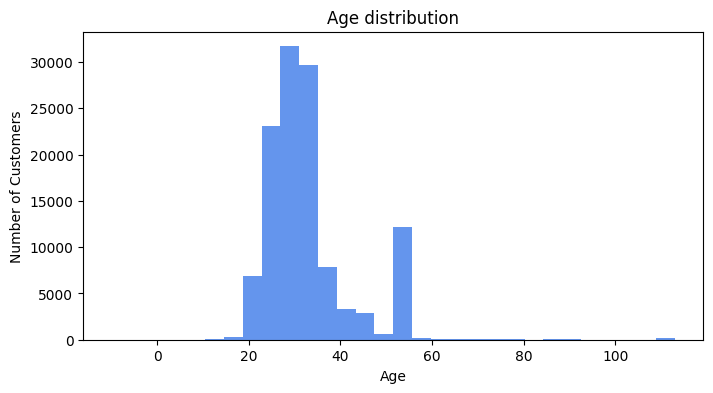

In [ ]:
#Vẽ biểu đồ Histogram theo Age để xem phân bổ của tuổi
plt.figure(figsize=(8,4))
df_cus['age'].hist(bins=30,color='cornflowerblue',grid=False)

plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
#Xem độ tuổi phổ biến
df_cus_top_age = df_cus[df_cus['usergender']!='Not verify'].groupby('age').agg(total_customers=('customer_id','count')).sort_values(by='total_customes',ascending=False).reset_index()
df_cus_top_age.head(10)

KeyError: 'total_customes'

In [ ]:
df_cus_top_age = df_cus[df_cus['usergender']!='Not verify'].groupby('age').agg(total_customers=('customer_id','count')).sort_values(by='age',ascending=False).reset_index()
df_cus_top_age.head(10)

Notes: Nhìn qua biểu đồ, nhận xét:
+ Phần lớn khách hàng có độ tuổi tập trung trong khoảng từ 25 đến 35 tuổi.
+ Đỉnh của biểu đồ nằm trong khoảng 30-35 tuổi, cho thấy đây là độ tuổi có số lượng khách hàng cao nhất.
+ Có một vài điểm bất thường, ví dụ độ tuổi 55-60 tăng lên(bất thường)
+ Vẫn có khách hàng độ tuổi trên 100 tuổi đặt vé (Phải xác thực lại)

In [ ]:
# Vẽ phân bổ Age theo Gender (3 cái Histogram chồng lên nhau)
# Phân bố độ tuổi theo giới tính

#1. Chỉnh size của histogram đầu tiên
plt.figure(figsize=(8,4))

#2.Lọc Data
male_age= df_cus[df_cus['usergender']=='Male']['age']
female_age=df_cus[df_cus['usergender']=='Female']['age']
unknown_age=df_cus[df_cus['usergender']=='Not verify']['age']

#3.Vẽ từng Histogram
plt.hist(male_age, bins=30, alpha=0.3, color='cornflowerblue', label='Male')
plt.hist(female_age, bins=30, alpha = 0.3, color = 'salmon', label = 'Female')
plt.hist(unknown_age, bins=30, alpha = 0.3, color = 'limegreen', label = 'Not verify')

#4.Chỉnh các yếu tố khác
plt.title('Phân bố độ tuổi theo giới tính')
plt.xlabel('ages')
plt.ylabel('Number of customers')
plt.legend()
plt.show()


Notes: Nhận thấy có một sự trùng hợp đó là nhóm Gender verify (màu limegreen) cũng nằm ở đoạn gần trùng với độ tuổi 55
 > Đặt ra câu hỏi: Phải chăng số lượng người ở đoạn tuổi đó chưa xác thực tài khoản (Nên giới tính thì chưa xác định được còn dob thì có thể mặc định là 1970?)


### **Kiểm tra lại nhóm 'Not Verify'**

In [ ]:
#Nhóm lại theo Gender xem mỗi nhóm gender có bao nhiêu khách hàng tương ứng (id_customer)

df_gender= df_cus.groupby('usergender').agg(total_cus=('customer_id','count')).reset_index()
df_gender

In [ ]:
#Tỉ trọng theo 3 nhóm giới tính
plt.figure(figsize=(8,4))

plt.pie(df_gender['total_cus'],
        labels=df_gender['usergender'],
        colors=['cornflowerblue','lightsteelblue','slategrey'],
        autopct='%1.0f%%',
        startangle=90)

plt.title('Gender Proportion')
plt.show()

Notes:
+ Nhóm khách hàng chưa verify chiếm hơn 11%. Dẫn tới 2 trường hợp:
+ Nó họ nhập Dob sẽ có Data (Tức là số tuổi đúng thật là số tuổi của họ)
+ Nếu họ không nhập thì hệ thống sẽ auto fill là 1970 (~55 tuổi)/ Ở đoạn này chỉ là suy đoán, vì thường thường các app hay mặc định như thế (Nếu khách hàng chưa điền thông tin Dob thì sẽ để là 1970/ Lúc đó data về tuổi sẽ xuất hiện Outliers?)
> Kiểm tra lại bằng cách số tuổi cụ thể của nhóm tuổi verify

In [ ]:
df_cus_check=df_cus[df_cus['usergender']=='Not verify'].groupby('age').agg(number=('customer_id','count')).reset_index().sort_values(by='number',ascending=False)
df_cus_check.head(5)

age  number
38   55   11434
12   29     131
14   31     120
10   27     114
9    26     107

Notes:
+ Có thể nhận thấy phần tăng lên ở đuôi của nhóm "Verify" gần trung với đoạn của nhóm tuổi 55, mà hiện tại là 2025 thì 55 tuổi tức là sinh năm 1970 (đúng)
=> Nên có khả năng cao là nhóm khách hàng đó không điền thông tin Dob (nên bị mặc định là sinh năm 1970) HOẶC chính họ tự nhập và có data vè Dob là năm 1970

### **Age generation distribution**

Notes: Thay vì phân bổ theo độ tuổi riêng lẻ, thì mình có thể nhóm các độ tuổi lại để nhìn bao quát hơn hành vi mua hàng của các nhóm tuổi này
=> 4 NHÓM: X, Y, Z, Baby boomers

In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   

     campaign_type       model platform        age  
0  direct discount  iPhone13,1   mobile  36.013689  
1  direct discount     browser  website  33.730322

In [ ]:
df_cus_3 = df_join_all.drop_duplicates(subset=['customer_id'])[['customer_id','dob','usergender','age']]
df_cus_3['age']=df_cus_3['age'].astype(int)
df_cus_3.head(5)

customer_id        dob usergender  age
0       100009 1989-02-25       Male   36
1       100493 1991-06-09       Male   33
2       100596 1989-05-18       Male   35
3       100852 1997-08-31       Male   27
4       100965 1988-09-20       Male   36

Notes: Phân nhóm tuổi (dựa vào năm sinh)

#### **Nội dung phân nhóm tuổi theo thế hệ:**
> Trong nghiên cứu nhân khẩu học, các nhóm thế hệ thường được phân chia dựa trên năm sinh. Dưới đây là các nhóm phổ biến:
Ví dụ năm hiện tại là 2025
+ Baby Boomers (1946 - 1964): 61-79
+ Generation X (1965 - 1980):45- 60
+ Generation Y (Millennials) (1981 - 1996): 29-44
+ Generation Z (1997 - 2012): 16-28


Notes: Ở phần này, dù có một vài khách hàng không thuộc nhóm tuổi Baby Boomers (lớn tuổi hơn) nhưng bài phân tích dưới đã gộp vào để phân tích cả 2 nhóm thế hệ này

In [ ]:
df_cus_3['age_generation'] = df_cus_3['dob'].apply(lambda x: 'Baby Bommers' if x.year < 1965
                                                     else 'Gen X' if x.year < 1981
                                                     else 'Gen Y' if x.year < 1997
                                                     else 'Gen Z' if x.year < 2013 else 'Others')
df_cus_3.head(4)

customer_id        dob usergender  age age_generation
0       100009 1989-02-25       Male   36          Gen Y
1       100493 1991-06-09       Male   33          Gen Y
2       100596 1989-05-18       Male   35          Gen Y
3       100852 1997-08-31       Male   27          Gen Z

Notes:
+ Histogram xem phân bổ tuổi 'Age Distribution'
+ Pie chart xem phân bổ % của từng nhóm tuổi

In [ ]:
df_cus_4= df_cus_3[df_cus_3['usergender']!='Not verify'].groupby('age_generation').agg(total_cus = ('customer_id','count')).sort_values(by='total_cus',ascending=False).reset_index()
df_cus_4.head(5)

age_generation  total_cus
0          Gen Y      63310
1          Gen Z      38358
2          Gen X       4261
3   Baby Bommers        590
4         Others         43

In [ ]:
df_cus_4['total']=df_cus_4['total_cus'].sum()
df_cus_4

age_generation  total_cus   total
0          Gen Y      63310  106562
1          Gen Z      38358  106562
2          Gen X       4261  106562
3   Baby Bommers        590  106562
4         Others         43  106562

In [ ]:
df_cus_4['percent_gen']=((df_cus_4['total_cus']/df_cus_4['total'])*100).round(2)
df_cus_4

age_generation  total_cus   total  percent_gen
0          Gen Y      63310  106562        59.41
1          Gen Z      38358  106562        36.00
2          Gen X       4261  106562         4.00
3   Baby Bommers        590  106562         0.55
4         Others         43  106562         0.04

Notes: Vẫn có xuất hiện nhóm Other -> Kiểm tra lại thông tin của 43 khách hàng này ở df_cus_3

In [ ]:
df_others_gen = df_cus_3[df_cus_3['age_generation']=='Others'][['customer_id','dob','age']].sort_values(by='age',ascending=False)
df_others_gen.head(5)

customer_id        dob  age
15613        155381 2013-01-20   12
3199         127245 2014-01-01   11
44806        177617 2013-06-06   11
135395       177976 2013-05-06   11
123282       209564 2014-01-01   11

#### Notes:
+ Có 1 khách hàng có số tuổi bị âm (-10), cần kiểm tra lại thông tin khác hàng này
+ Các khách hàng còn lại có nhóm tuổi alpha (sinh năm 2013-nay), và chiếm 0.12% số lượng khách hàng của toàn bộ dữ liệu
=> Lập lại table mới (loại bỏ 1 thông tin khách hàng có số tuổi bị âm, và thêm nhóm tuổi Alpha)

In [ ]:
df_cus_3 = df_cus_3[df_cus_3['age']>0]
df_cus_3['age_generation'] = df_cus_3['dob'].apply(lambda x: 'Baby Bommers' if x.year < 1965
                                                     else 'Gen X' if x.year < 1981
                                                     else 'Gen Y' if x.year < 1997
                                                     else 'Gen Z' if x.year < 2010
                                                     else 'Gen Alpha')
df_cus_3.head(4)

customer_id        dob usergender  age age_generation
0       100009 1989-02-25       Male   36          Gen Y
1       100493 1991-06-09       Male   33          Gen Y
2       100596 1989-05-18       Male   35          Gen Y
3       100852 1997-08-31       Male   27          Gen Z

In [ ]:
df_cus_4= df_cus_3[df_cus_3['usergender']!='Not verify'].groupby('age_generation').agg(total_cus = ('customer_id','count')).sort_values(by='total_cus',ascending=False).reset_index()
df_cus_4.head(5)

age_generation  total_cus
0          Gen Y      63310
1          Gen Z      38276
2          Gen X       4261
3   Baby Bommers        590
4      Gen Alpha        124

Notes: Nhận xét về số lượng khách hàng của các nhóm (Gen Z là lượng khách hàng nhiều nhất)

#### **Combined view of 2 charts**

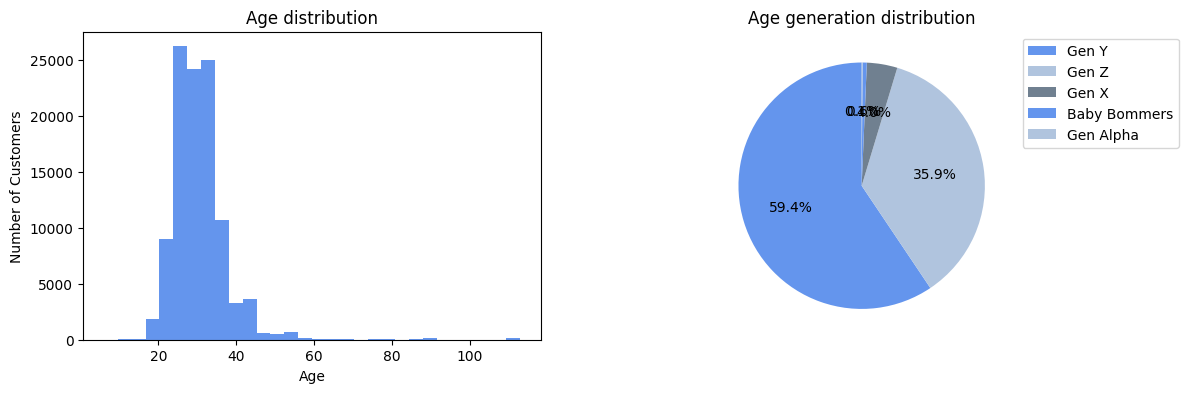

In [ ]:
#Kiểu 1 (Histogram 1 màu)
#Kết hợp 2 biểu đồ cùng 1 lúc (Mỗi biểu đồ phải khai báo lệnh subplot() nha)

#B1: Khai báo figsize
plt.figure(figsize=(13,4))

#B2:Vẽ plot 1 (Histogram)
ax1 = plt.subplot(1,2,1) #Trình bày trên cùng 1 hàng; có 2 cột; plot 1 nằm ở vị trí số 1 (left)
df_cus_3[df_cus_3['usergender']!= 'Not verify']['age'].hist(bins=30,color='cornflowerblue',grid=False)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

#B3: Vẽ plot 2 (Pie Chart)
ax2 = plt.subplot(1,2,2)
plt.pie(df_cus_4['total_cus'],
        labels=None,
        colors=['cornflowerblue','lightsteelblue','slategrey'],
        autopct='%1.1f%%',
        startangle=90,
        labeldistance=1.1)
plt.legend(df_cus_4['age_generation'],loc="upper left", bbox_to_anchor=(1, 1))
plt.title('Age generation distribution')

plt.show() #Nhớ là chỉ khai báo lệnh này 1 lần thôi

Notes: Sau khi loại bỏ nhóm usergender 'Not verify' thì Age distribution cũng đã không còn phần Outliers

## **3.2 Time Series Data - When did customers buy tickets**

In [ ]:
df_join_all.head(4)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   
2  1fdbeb7eceba8a27d9d985b5b70c219a       100596  money in app          56.0   
3  7715c9955866bd296b98543412839abd       100852  bank account         119.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   
2  69cf9244654949047f006e441fa7a8a7           10.31            2.31   
3  879ed11af9d6d2b5cda4d299590735a7           27.75            1.03   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   
2         8.00 2022-07-30 11:16:55.483          1            0   
3        26.72 2022-07-04 22:33:07.458          1        85940   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   
2  Thor: Love And Thunder       Male 1989-05-18  Order successful     unknown   
3  Thor: Love And Thunder       Male 1997-08-31  Order successful     unknown   

     campaign_type        model platform        age  
0  direct discount   iPhone13,1   mobile  36.013689  
1  direct discount      browser  website  33.730322  
2          unknown      unknown   mobile  35.789185  
3  direct discount  devicemodel   mobile  27.501711

In [ ]:
# Xem xu hướng tiêu dùng (số lượng vé bán ra) weekly, monthly, yearly or month-year (cột TIME)
# Tạo thêm các cột mới

df_join_all['Month']=df_join_all['time'].dt.month
df_join_all['Hour']=df_join_all['time'].dt.hour
df_join_all['Day Name']=df_join_all['time'].dt.day_name()
df_join_all['year_month']=df_join_all['time'].dt.strftime('%Y-%m')


#### **Số lượng vé được giao dịch theo Month Year**

In [ ]:
#Table Số lượng vé được giao dịch theo Month Year

df_month_year = df_join_all.groupby('year_month').agg(no_of_tickets=('ticket_id','count')).sort_values(by='year_month').reset_index()
df_month_year.head(4)

year_month  no_of_tickets
0    2019-01           2019
1    2019-02           1626
2    2019-03           1004
3    2019-04           4069

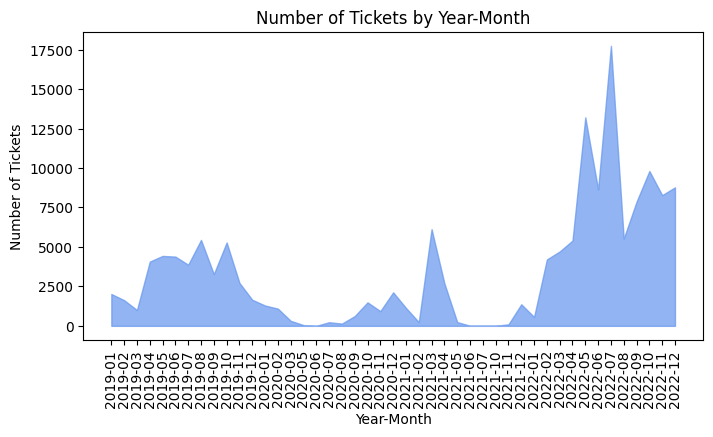

In [ ]:
#Vẽ biểu đồ miền theo tháng
plt.figure(figsize=(8,4))

plt.fill_between(df_month_year['year_month'],
                 df_month_year['no_of_tickets'],
                 color='cornflowerblue',
                 alpha=0.7)

plt.title('Number of Tickets by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90)
plt.show()

**Notes:**
Xem xét khoảng thời gian có một vài mốc thời gian không hiển thị
> Làm bảng dimension thời gian rồi join 2 bảng lại để xem là bị lỗi gì hay bị thiếu dữ liệu của các tháng này
(4/2020; 8/2021; 9/2021)

#### **BẢNG DIMENSION THỜI GIAN**

In [ ]:
#Xác định khoảng thời gian nằm trong khoảng nào
start_date = '2019-01-01'
end_date = '2022-12-31'

#Tạo ra range thời gian từ 2 mốc start và end
date_range = pd.date_range(start=start_date, end=end_date,freq='MS')

#Lấy ra list phần tử thời gian tương ứng
list_month = date_range.month
list_month_name = date_range.strftime('%B')
list_year = date_range.year
list_year_month = date_range.strftime('%Y-%m')

# # Khởi tạo dataframe
dim_time = pd.DataFrame({
    'month_number': list_month,
    'month_name': list_month_name,
    'year': list_year,
    'year_month': list_year_month
})
dim_time.head(4)

month_number month_name  year year_month
0             1    January  2019    2019-01
1             2   February  2019    2019-02
2             3      March  2019    2019-03
3             4      April  2019    2019-04

In [ ]:
# Merge 2 bảng với nhau (để fill nốt month_year còn thiếu)
df_time_merge = pd.merge(dim_time,df_month_year,how='left',on='year_month')
df_time_merge.head(4)

month_number month_name  year year_month  no_of_tickets
0             1    January  2019    2019-01         2019.0
1             2   February  2019    2019-02         1626.0
2             3      March  2019    2019-03         1004.0
3             4      April  2019    2019-04         4069.0

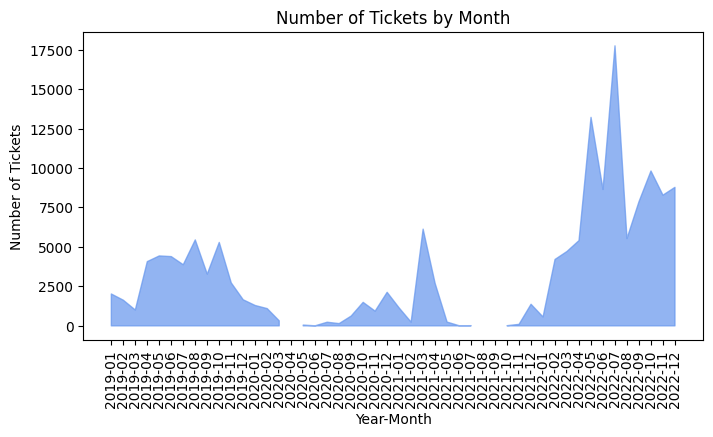

In [ ]:
#Vẽ biểu đồ miền theo tháng
plt.figure(figsize=(8,4))

plt.fill_between(df_time_merge['year_month'],
                 df_time_merge['no_of_tickets'],
                 color='cornflowerblue',
                 alpha=0.7)

plt.title('Number of Tickets by Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90)
plt.show()

Notes:
+ Lúc này các giá trị bị thiếu (Phần đồ thị của NaA đã bị trống)

#### **Số lượng vé được giao dịch theo Day Name**

In [ ]:
df_day_name = df_join_all.groupby('Day Name').agg(no_of_tickets=('ticket_id','count')).sort_values(by='Day Name').reset_index()
df_day_name

Day Name  no_of_tickets
0     Friday          26438
1     Monday          16702
2   Saturday          34450
3     Sunday          26960
4   Thursday          19101
5    Tuesday          14793
6  Wednesday          16281

In [ ]:
# Số lượng vé bán ra các ngày cuối tuần (Fri-Sun) gấp mấy lần các ngày trong tuần (Mon-Thur):
(26438+34450+26960)/(16702+19101+14793+16281)

1.3135756687650464

In [ ]:
df_join_all['Dayofweek']=df_join_all['time'].dt.dayofweek
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   

     campaign_type       model platform        age  Month  Hour Day Name  \
0  direct discount  iPhone13,1   mobile  36.013689      7    17   Friday   
1  direct discount     browser  website  33.730322      7    20   Friday   

  year_month  Dayofweek  
0    2022-07          4  
1    2022-07          4

In [ ]:
df_day_name_1 = df_join_all.groupby(['Dayofweek','Day Name']).agg(no_of_tickets=('ticket_id','count')).sort_values(by='Dayofweek').reset_index()
df_day_name_1.head(4)


Dayofweek   Day Name  no_of_tickets
0          0     Monday          16702
1          1    Tuesday          14793
2          2  Wednesday          16281
3          3   Thursday          19101

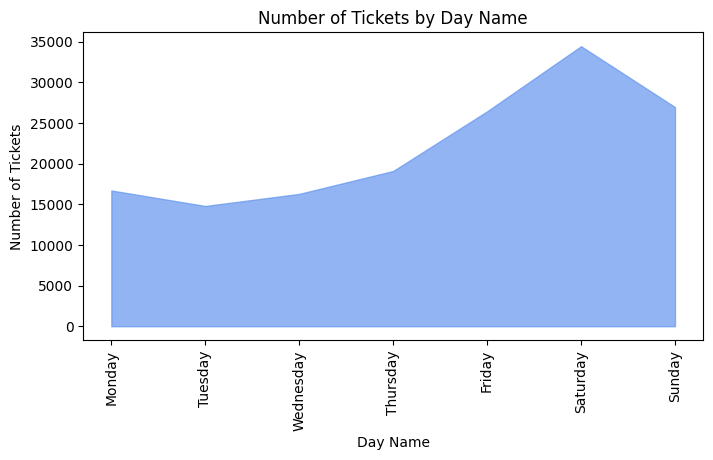

In [ ]:
#Vẽ biểu đồ miền theo thứ trong tuần
plt.figure(figsize=(8,4))

plt.fill_between(df_day_name_1['Day Name'],
                 df_day_name_1['no_of_tickets'],
                 color='cornflowerblue',
                 alpha=0.7)

plt.title('Number of Tickets by Day Name')
plt.xlabel('Day Name')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90)
plt.show()

#### **Số lượng vé được giao dịch theo Hour**

In [ ]:
df_hour = df_join_all.groupby('Hour').agg(no_of_tickets=('ticket_id','count')).sort_values(by='Hour').reset_index()
df_hour.head(4)

Hour  no_of_tickets
0     0           2352
1     1            964
2     2            398
3     3            159

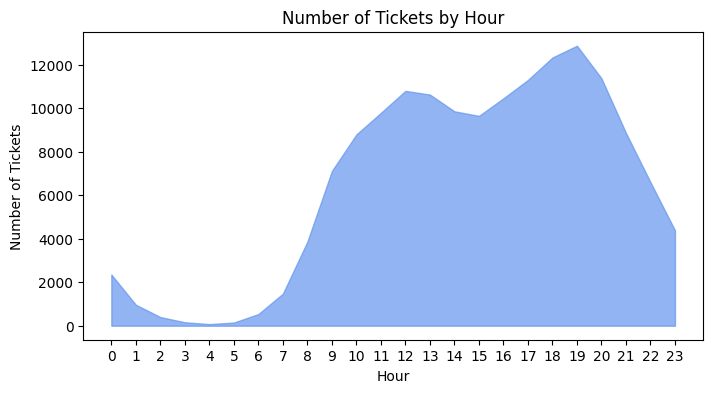

In [ ]:
#Vẽ biểu đồ miền theo giờ
plt.figure(figsize=(8,4))
plt.fill_between(df_hour['Hour'],df_hour['no_of_tickets'],color='cornflowerblue',alpha=0.7)

x_values = [i for i in range(24)] #Chia các mốc thời gian trong ngày

plt.title('Number of Tickets by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Tickets')
plt.xticks(x_values)
plt.show()

**Notes:**
+ Khung giờ sáng (0h-7h), lượng vé bán ra khá ít, chỉ dao động trong khoảng 0-2000 vé
+ Từ 7h-12h: Số lượng vé bắt đầu tăng lên và giảm xuống từ đoạn 19h-0h
+ 2 khung giờ bán ra số lượng vé lớn nhất là 11h-13h và 18h-20h

In [ ]:
df_hour.sort_values(by='no_of_tickets', ascending=False).head(4)

Hour  no_of_tickets
19    19          12869
18    18          12328
20    20          11372
17    17          11296

#### **Combined view of 3 charts**

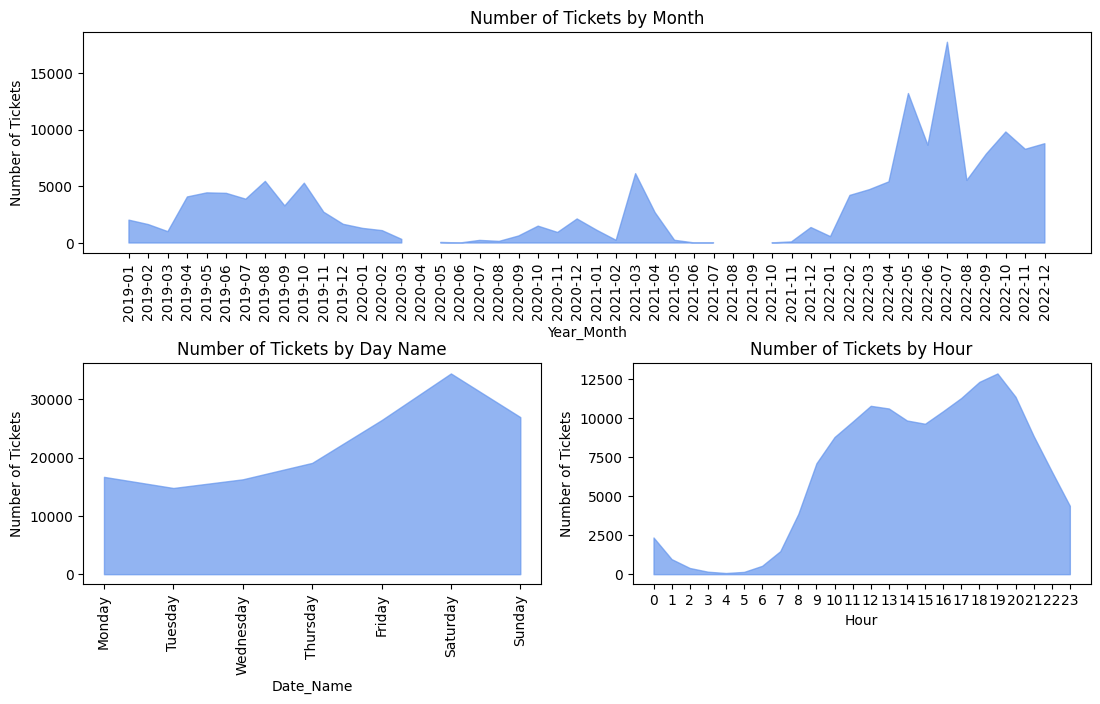

In [ ]:
#Khai báo figsize
plt.figure(figsize=(13,8))

#Plot 1
ax1 = plt.subplot(2,1,1)
plt.fill_between(df_time_merge['year_month'],df_time_merge['no_of_tickets'],color='cornflowerblue',alpha=0.7)
plt.title('Number of Tickets by Month')
plt.xlabel('Year_Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90) #Các giá trị ở trục X quanh 90 độ cho dễ nhìn


#Plot 2
ax2 = plt.subplot(2,2,3)
plt.fill_between(df_day_name_1['Day Name'],df_day_name_1['no_of_tickets'],color='cornflowerblue',alpha=0.7)
plt.title('Number of Tickets by Day Name')
plt.xlabel('Date_Name')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90) #Các giá trị ở trục X quanh 90 độ cho dễ nhìn


#Plot 3
#Vẽ biểu đồ miền theo thứ trong tuần
ax3 = plt.subplot(2, 2, 4)
plt.fill_between(df_hour['Hour'],df_hour['no_of_tickets'],color='cornflowerblue',alpha=0.7)
x_values = [i for i in range(24)] #Mốc 24h là 0h đó
plt.title('Number of Tickets by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Tickets')
plt.xticks(x_values)


#Lệnh này để tăng khoảng cách của các biểu đồ ra
plt.subplots_adjust(hspace=0.5, top=0.8)

## **3.3 Factors Analysis**

### **Payment Platform**

In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   

     campaign_type       model platform        age  Month  Hour Day Name  \
0  direct discount  iPhone13,1   mobile  36.013689      7    17   Friday   
1  direct discount     browser  website  33.730322      7    20   Friday   

  year_month  Dayofweek  
0    2022-07          4  
1    2022-07          4

In [ ]:
df_platform_0 = df_join_all.groupby('platform').agg(no_of_tickets=('ticket_id','count')).reset_index()
df_platform_0

platform  no_of_tickets
0   mobile         138136
1  unknown             78
2  website          16511

In [ ]:
calc_null_rate(df_platform_0)

null_count  null_rate
platform                0        0.0
no_of_tickets           0        0.0

Notes: Ở các thiết bị không xác định được 'Unknown' chỉ 78, số lượng rất nhỏ so với tổng thể, có thể lược đi thành phần này để so sánh xu hướng payment platform giữa mobile  và website

In [ ]:
df_platform = df_join_all[df_join_all['platform'] != 'unknown'].groupby('platform').agg(no_of_tickets=('ticket_id','count')).reset_index()
df_platform

platform  no_of_tickets
0   mobile         138136
1  website          16511

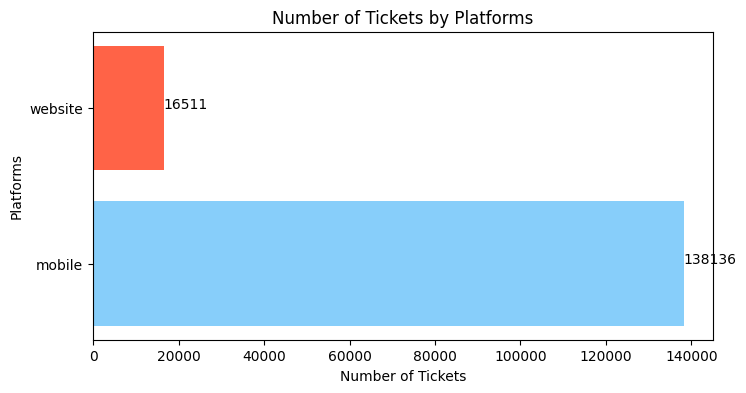

In [ ]:
# Vẽ biểu đồ cột ngang

plt.figure(figsize=(8,4))

plt.barh(
    df_platform['platform'],
    df_platform['no_of_tickets'],
    color = df_platform['platform'].replace({'mobile':'lightskyblue','website':'tomato'})
)

plt.title('Number of Tickets by Platforms')
plt.ylabel('Platforms')
plt.xlabel('Number of Tickets')

for index, value in enumerate(df_platform['no_of_tickets']):
  plt.text(value, index, str(value))

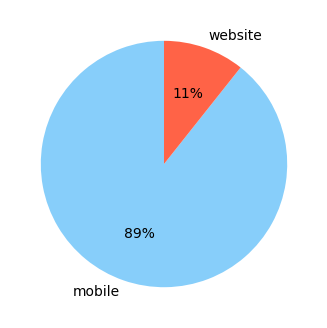

In [ ]:
#Vẽ pie chart

plt.figure(figsize=(13,4))

plt.pie(
    df_platform['no_of_tickets'],
    labels = df_platform['platform'],
    colors=df_platform['platform'].replace({'mobile':'lightskyblue','website':'tomato'}),
    autopct = '%1.0f%%',
    startangle=90
)

plt.show()

In [ ]:
# Table theo thời gian -> Xem xu hướng dùng platforms thay đổi như thế nào theo thời gian
df_platform_1 = df_join_all.groupby(['year_month','platform']).agg(
    no_of_tickets=('ticket_id','count')
).reset_index()
df_platform_1

year_month platform  no_of_tickets
0     2019-01   mobile           2019
1     2019-02   mobile           1626
2     2019-03   mobile           1004
3     2019-04   mobile           4069
4     2019-05   mobile           4430
..        ...      ...            ...
71    2022-10  website           1849
72    2022-11   mobile           6677
73    2022-11  website           1603
74    2022-12   mobile           6959
75    2022-12  website           1815

[76 rows x 3 columns]

In [ ]:
df_platform_1 = df_platform_1[df_platform_1['platform'] != 'unknown']
df_platform_1

year_month platform  no_of_tickets
0     2019-01   mobile           2019
1     2019-02   mobile           1626
2     2019-03   mobile           1004
3     2019-04   mobile           4069
4     2019-05   mobile           4430
..        ...      ...            ...
71    2022-10  website           1849
72    2022-11   mobile           6677
73    2022-11  website           1603
74    2022-12   mobile           6959
75    2022-12  website           1815

[71 rows x 3 columns]

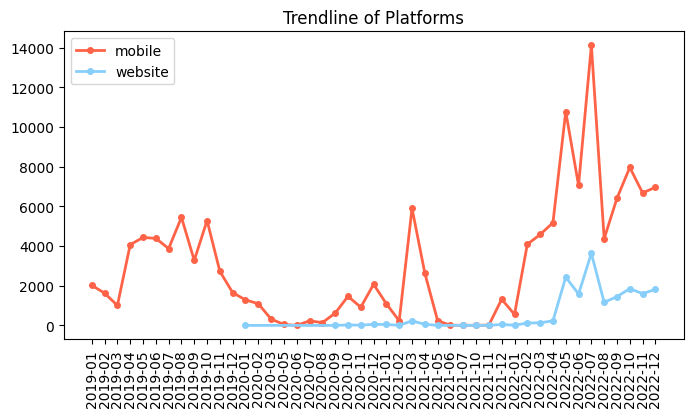

In [ ]:
# Vẽ Line charts

plt.figure(figsize=(8,4))

#Khai báo data
df_mobile_line = df_platform_1[df_platform_1['platform']=='mobile']
df_website_line = df_platform_1[df_platform_1['platform']=='website']

#Line 1:
plt.plot(df_mobile_line['year_month'],
         df_mobile_line['no_of_tickets'],
         label = 'mobile',
         marker = 'o',
         markersize = 4,
         color = 'tomato',
         linewidth = 2,
)

#Line 2:
plt.plot(df_website_line['year_month'],
         df_website_line['no_of_tickets'],
         label = 'website',
         marker = 'o',
         markersize = 4,
         color = 'lightskyblue',
         linewidth = 2,
)

plt.title('Trendline of Platforms')
plt.xticks(rotation=90)
plt.legend()

plt.show()


In [ ]:
# Website vào khoảng thời gian nào thì mới bắt đầu sử dụng:
df_website_line.sort_values(by='year_month').head(5)


year_month platform  no_of_tickets
13    2020-01  website              2
21    2020-09  website              2
23    2020-10  website             22
25    2020-11  website             15
27    2020-12  website             53

Notes: Vào đầu năm 2020 (tháng 1) thì website mới được bắt đầu sử dụng, và đến tháng 9/2020 mới có tiếp dữ liệu về nền tảng này

### **Operating System version**

In [ ]:
df_join_all['model'].unique()

array(['iPhone13,1', 'browser', 'unknown', ..., 'Samsung SM-J727S',
       'Zuk Z1', 'Samsung SM-N9750'], dtype=object)

> Phiên bản hệ điều hành: Chia thành 4 loại:
+ IOS (Các model có từ 'iPhone')
+ Android others (có từ 'Samsung','Oppo',...)
+ Browser (browser)
+ Unknown (các thiết bị chưa xác định được)

In [ ]:
df= df_join_all.groupby('model').agg(no_of_tickets=('ticket_id','count')).sort_values(by='no_of_tickets',ascending=False).reset_index()

df

model  no_of_tickets
0       devicemodel          61867
1           browser          13377
2           unknown           6987
3        iPhone11,6           6119
4         iPhone9,4           4172
...             ...            ...
1210     Sony E6553              1
1211     OPPO X9006              1
1212     Sony E5653              1
1213     Sony E5563              1
1214  Alps SM-G965F              1

[1215 rows x 2 columns]

In [ ]:
# Kiểm tra các tên sản phẩm của cột model
df_filtered = df[df['model'].str.contains('iPod', case=False, na=False)]
df_filtered

model  no_of_tickets
841  iPod5,1              2

In [ ]:
df_filtered = df[df['model'].str.contains('iPad', case=False, na=False)]
df_filtered.head(5)

model  no_of_tickets
153  iPad5,4             36
242  iPad7,5             17
358  iPad7,3              8
384  iPad5,2              7
385  iPad7,4              7

In [ ]:
#Thêm cột 'os_version' vào bảng join_all
df_join_all['os_version'] = df_join_all['model'].apply(lambda x:'ios'
                                       if ('iPhone' in x or 'iPod' in x or 'iPad' in x)
                                       else 'browser' if x=='browser'
                                       else 'unknown' if x=='unknown'
                                       else 'android & others')

df_join_all.head(4)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   
2  1fdbeb7eceba8a27d9d985b5b70c219a       100596  money in app          56.0   
3  7715c9955866bd296b98543412839abd       100852  bank account         119.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   
2  69cf9244654949047f006e441fa7a8a7           10.31            2.31   
3  879ed11af9d6d2b5cda4d299590735a7           27.75            1.03   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   
2         8.00 2022-07-30 11:16:55.483          1            0   
3        26.72 2022-07-04 22:33:07.458          1        85940   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   
2  Thor: Love And Thunder       Male 1989-05-18  Order successful     unknown   
3  Thor: Love And Thunder       Male 1997-08-31  Order successful     unknown   

     campaign_type        model platform        age  Month  Hour  Day Name  \
0  direct discount   iPhone13,1   mobile  36.013689      7    17    Friday   
1  direct discount      browser  website  33.730322      7    20    Friday   
2          unknown      unknown   mobile  35.789185      7    11  Saturday   
3  direct discount  devicemodel   mobile  27.501711      7    22    Monday   

  year_month  Dayofweek        os_version  
0    2022-07          4               ios  
1    2022-07          4           browser  
2    2022-07          5           unknown  
3    2022-07          0  android & others

In [ ]:
df_model_1 = df_join_all.groupby('os_version').agg(no_of_tickets=('ticket_id','count')).reset_index()
df_model_1

os_version  no_of_tickets
0  android & others          82801
1           browser          13377
2               ios          51560
3           unknown           6987

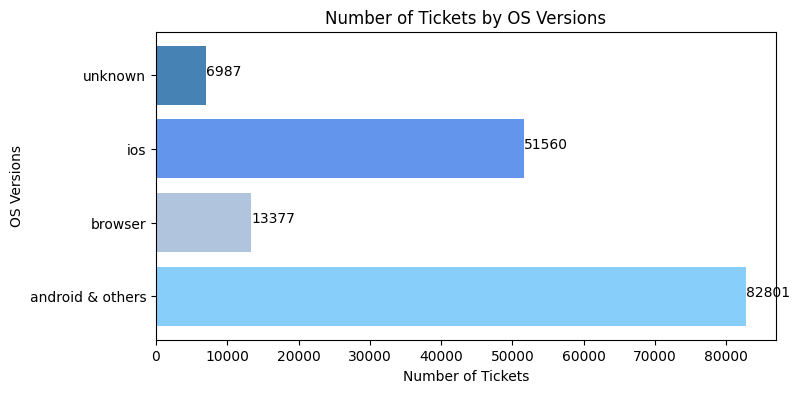

In [ ]:
# Vẽ biểu đồ cột ngang

plt.figure(figsize=(8,4))

plt.barh(
    df_model_1['os_version'],
    df_model_1['no_of_tickets'],
    color = df_model_1['os_version'].replace({'browser': 'lightsteelblue',  'android & others': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'})
)

plt.title('Number of Tickets by OS Versions')
plt.ylabel('OS Versions')
plt.xlabel('Number of Tickets')

for index, value in enumerate(df_model_1['no_of_tickets']):
  plt.text(value, index, str(value))

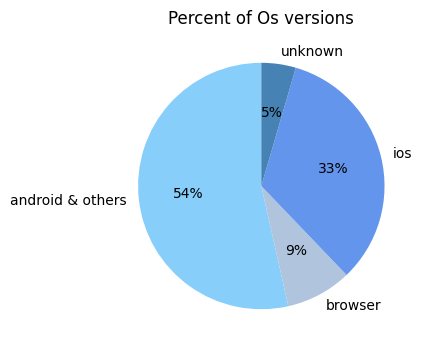

In [ ]:
#Vẽ pie chart

plt.figure(figsize=(13,4))

plt.pie(
    df_model_1['no_of_tickets'],
    labels = df_model_1['os_version'],
    colors=df_model_1['os_version'].replace({'browser': 'lightsteelblue',  'android & others': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}),
    autopct = '%1.0f%%',
    startangle=90
)
plt.title('Percent of Os versions')
plt.show()

**Vẽ biểu đồ miền**



In [ ]:
df_model_4 = (
    df_join_all
    .pivot_table(index='year_month', columns='os_version', aggfunc='count',values='ticket_id')
    .reset_index()

)
df_model_4.head(4)

os_version year_month  android & others  browser     ios  unknown
0             2019-01             704.0      NaN  1243.0     72.0
1             2019-02             537.0      NaN  1079.0     10.0
2             2019-03             366.0      NaN   636.0      2.0
3             2019-04            1504.0      NaN  2556.0      9.0

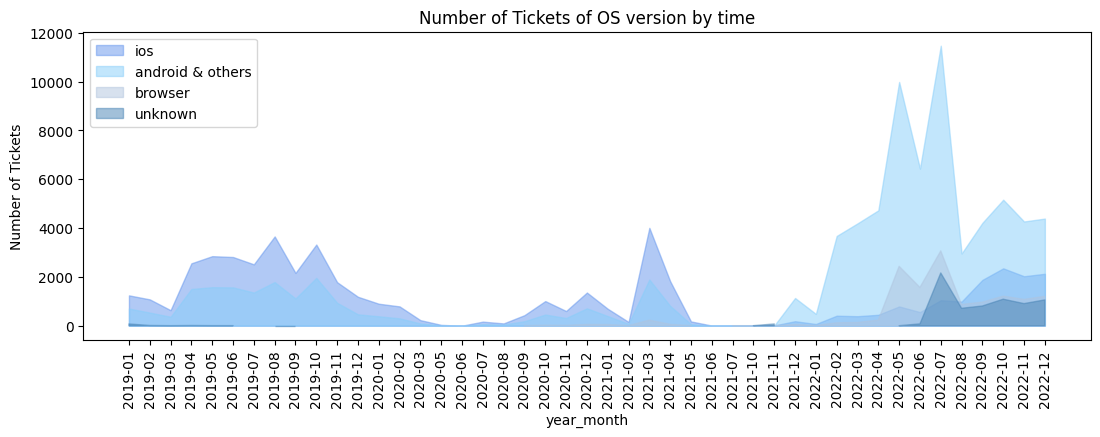

In [ ]:
#Vẽ biểu đồ miền của 4 yếu tố

plt.figure(figsize=(13,4))
plt.fill_between(df_model_4['year_month'], df_model_4['ios'],color='cornflowerblue',alpha=0.5, label='ios')
plt.fill_between(df_model_4['year_month'], df_model_4['android & others'],color='lightskyblue',alpha=0.5, label='android & others')
plt.fill_between(df_model_4['year_month'], df_model_4['browser'],color='lightsteelblue',alpha=0.5, label='browser')
plt.fill_between(df_model_4['year_month'], df_model_4['unknown'],color='steelblue',alpha=0.5, label='unknown')

plt.title('Number of Tickets of OS version by time')
plt.ylabel('Number of Tickets')
plt.xlabel('year_month')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### **Combined view of 3 charts**

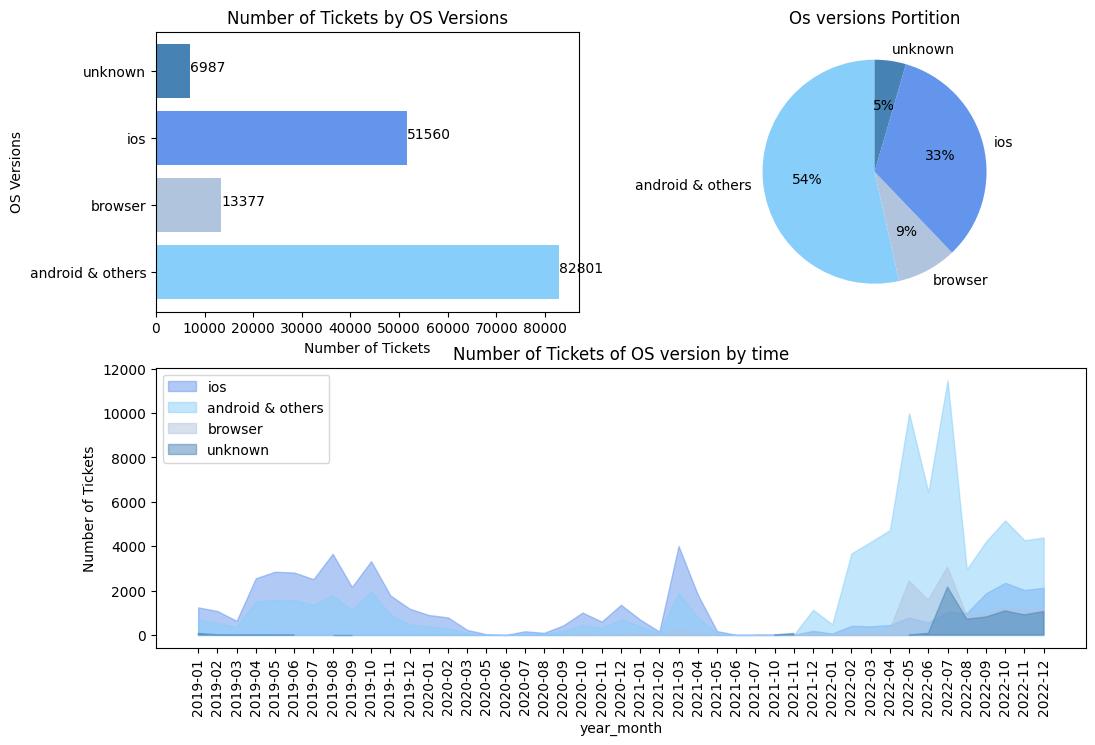

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))

#Plot 1
axis1 = plt.subplot(2,2,1)
plt.barh(
    df_model_1['os_version'], df_model_1['no_of_tickets'],
    color = df_model_1['os_version'].replace({'browser': 'lightsteelblue',  'android & others': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'})
)

plt.title('Number of Tickets by OS Versions')
plt.ylabel('OS Versions')
plt.xlabel('Number of Tickets')

for index, value in enumerate(df_model_1['no_of_tickets']):
  plt.text(value, index, str(value))

#Plot 2
axis2 = plt.subplot(2,2,2)
plt.pie(
    df_model_1['no_of_tickets'],
    labels = df_model_1['os_version'],
    colors=df_model_1['os_version'].replace({'browser': 'lightsteelblue',  'android & others': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}),
    autopct = '%1.0f%%',
    startangle=90
)
plt.title('Os versions Portition')

#Plot 3
axis3 = plt.subplot(2,1,2)
plt.fill_between(df_model_4['year_month'], df_model_4['ios'],color='cornflowerblue',alpha=0.5, label='ios')
plt.fill_between(df_model_4['year_month'], df_model_4['android & others'],color='lightskyblue',alpha=0.5, label='android & others')
plt.fill_between(df_model_4['year_month'], df_model_4['browser'],color='lightsteelblue',alpha=0.5, label='browser')
plt.fill_between(df_model_4['year_month'], df_model_4['unknown'],color='steelblue',alpha=0.5, label='unknown')


plt.title('Number of Tickets of OS version by time')
plt.ylabel('Number of Tickets')
plt.xlabel('year_month')
plt.xticks(rotation=90)
plt.legend()
plt.show()

plt.subplots_adjust(hspace=3, top=0.8)


### **Paying Method**


In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   

     campaign_type       model platform        age  Month  Hour Day Name  \
0  direct discount  iPhone13,1   mobile  36.013689      7    17   Friday   
1  direct discount     browser  website  33.730322      7    20   Friday   

  year_month  Dayofweek os_version  
0    2022-07          4        ios  
1    2022-07          4    browser

In [ ]:
df_payment_0 = df_join_all[df_join_all['paying_method'] != 'other']

In [ ]:
df_payment_1 = df_payment_0.groupby('paying_method').agg(no_of_orders=('ticket_id','count')).sort_values(by='no_of_orders').reset_index()
df_payment_1

paying_method  no_of_orders
0    debit card         15680
1   credit card         19820
2  bank account         52643
3  money in app         66580

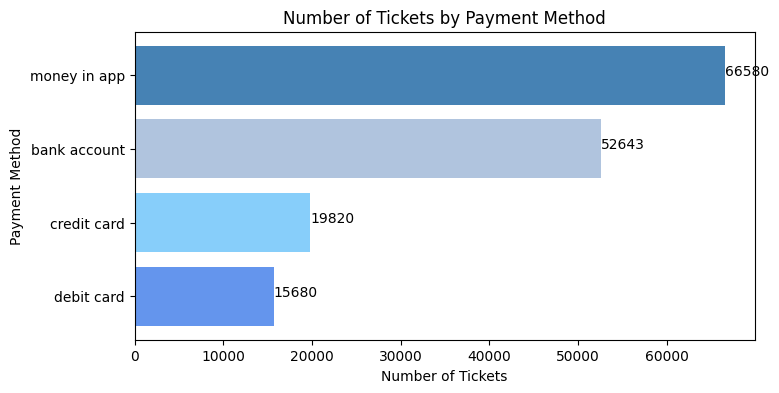

In [ ]:
# Vẽ cột ngang
plt.figure(figsize= (8,4))

plt.barh(df_payment_1['paying_method'],
         df_payment_1['no_of_orders'],
         color=df_payment_1['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'})
)

plt.title('Number of Tickets by Payment Method')
plt.ylabel('Payment Method')
plt.xlabel('Number of Tickets')

for index, value in enumerate(df_payment_1['no_of_orders']):
  plt.text(value, index, str(value))

Text(0.5, 1.0, 'Percent of Payment Method')

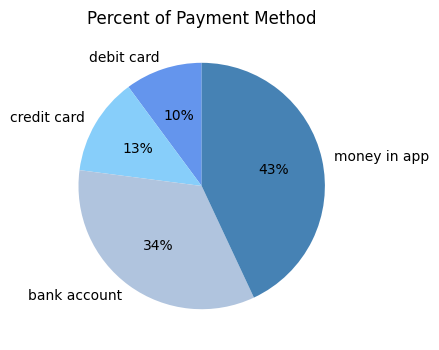

In [ ]:
#Vẽ pie chart
plt.figure(figsize=(8,4))

plt.pie(df_payment_1['no_of_orders'],
        labels=df_payment_1['paying_method'],
        colors=df_payment_1['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'}),
        autopct = '%1.0f%%',
    startangle=90)

plt.title('Percent of Payment Method')

In [ ]:
#Pivot table
df_payment_2 = (df_payment_0
                .pivot_table(index='year_month',columns='paying_method',aggfunc='count',values='ticket_id')
                .reset_index())
df_payment_2.head(4)

paying_method year_month  bank account  credit card  debit card  money in app
0                2019-01         880.0        506.0       161.0         472.0
1                2019-02         567.0        453.0       111.0         495.0
2                2019-03         373.0        268.0        91.0         272.0
3                2019-04        1540.0        946.0       276.0        1307.0

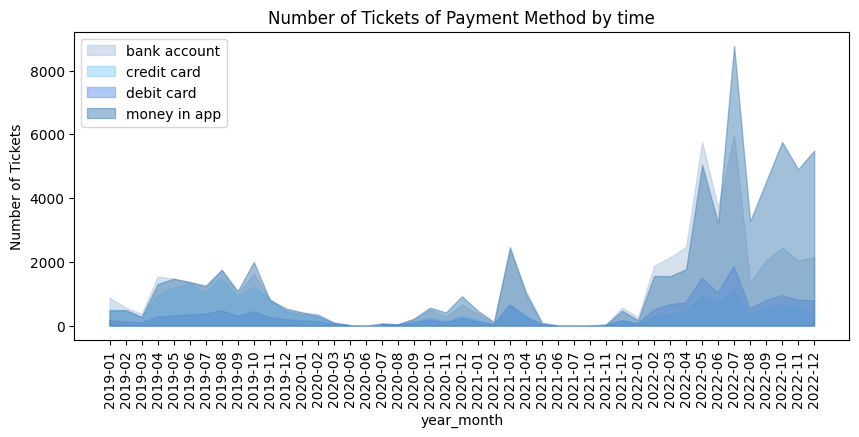

In [ ]:
#Vẽ biểu đồ miền
plt.figure(figsize=(10,4))

plt.fill_between(df_payment_2['year_month'],df_payment_2['bank account'],color='lightsteelblue',alpha=0.5, label='bank account')
plt.fill_between(df_payment_2['year_month'],df_payment_2['credit card'],color='lightskyblue',alpha=0.5, label='credit card')
plt.fill_between(df_payment_2['year_month'],df_payment_2['debit card'],color='cornflowerblue',alpha=0.5, label='debit card')
plt.fill_between(df_payment_2['year_month'],df_payment_2['money in app'],color='steelblue',alpha=0.5, label='money in app')

plt.title('Number of Tickets of Payment Method by time')
plt.ylabel('Number of Tickets')
plt.xlabel('year_month')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### **Vẽ biểu đồ miền dạng 100%**

In [ ]:
#Tạo bảng dạng %
df_payment_3 = df_payment_2.fillna(0)
df_payment_3['total'] = df_payment_2.iloc[:,1:].sum(axis=1)

#Tính %
for i in df_payment_3.columns[1:5]:
  df_payment_3[i+'_pct']= df_payment_3[i]/df_payment_3['total']
df_payment_3.head(5)

paying_method year_month  bank account  credit card  debit card  money in app  \
0                2019-01         880.0        506.0       161.0         472.0   
1                2019-02         567.0        453.0       111.0         495.0   
2                2019-03         373.0        268.0        91.0         272.0   
3                2019-04        1540.0        946.0       276.0        1307.0   
4                2019-05        1476.0       1180.0       302.0        1472.0   

paying_method   total  bank account_pct  credit card_pct  debit card_pct  \
0              2019.0          0.435859         0.250619        0.079742   
1              1626.0          0.348708         0.278598        0.068266   
2              1004.0          0.371514         0.266932        0.090637   
3              4069.0          0.378471         0.232490        0.067830   
4              4430.0          0.333183         0.266366        0.068172   

paying_method  money in app_pct  
0                      0.233779  
1                      0.304428  
2                      0.270916  
3                      0.321209  
4                      0.332280

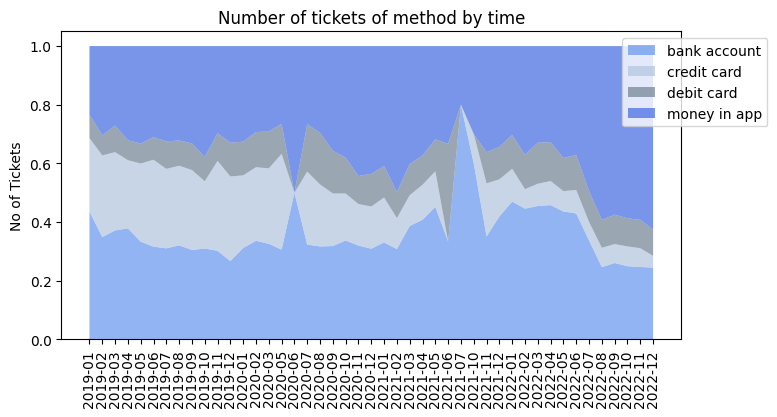

In [ ]:
#Vẽ biểu đồ miền 100%

plt.figure(figsize=(8,4))

plt.stackplot(df_payment_3['year_month'],
              df_payment_3['bank account_pct'],
              df_payment_3['credit card_pct'],
              df_payment_3['debit card_pct'],
              df_payment_3['money in app_pct'],
              labels = ['bank account','credit card',	'debit card',	'money in app'],
              colors=['cornflowerblue','lightsteelblue','slategrey','royalblue'],
              alpha=0.7
)

plt.title('Number of tickets of method by time')
plt.ylabel('No of Tickets')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)

plt.show()

#### **Combined view of 4 charts**

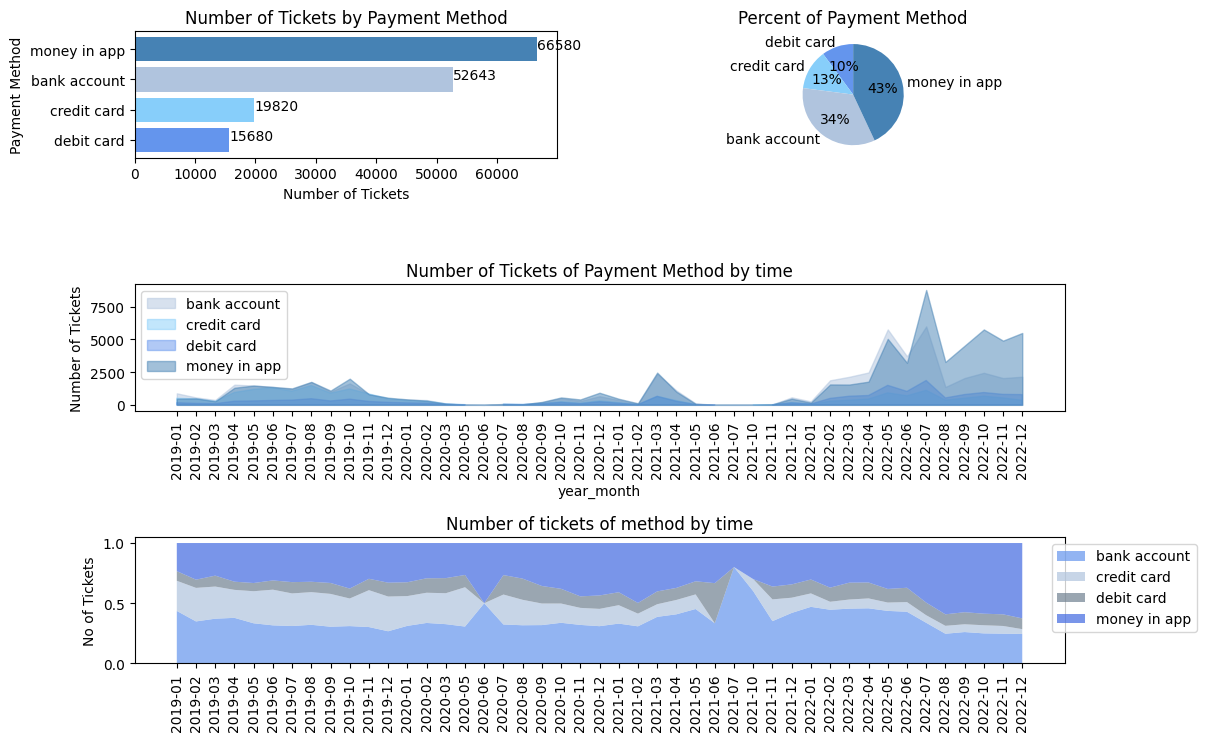

In [ ]:
plt.figure(figsize= (12,8))

#Plot 1
axis1=plt.subplot(3,2,1)
plt.barh(df_payment_1['paying_method'],
         df_payment_1['no_of_orders'],
         color=df_payment_1['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'})
)

plt.title('Number of Tickets by Payment Method')
plt.ylabel('Payment Method')
plt.xlabel('Number of Tickets')

for index, value in enumerate(df_payment_1['no_of_orders']):
  plt.text(value, index, str(value))

#Plot 2
axis2 = plt.subplot(3,2,2)
plt.pie(df_payment_1['no_of_orders'],
        labels=df_payment_1['paying_method'],
        colors=df_payment_1['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'}),
        autopct = '%1.0f%%',
    startangle=90)

plt.title('Percent of Payment Method')

#Plot 3
axis3= plt.subplot(3,1,2)
plt.fill_between(df_payment_2['year_month'],df_payment_2['bank account'],color='lightsteelblue',alpha=0.5, label='bank account')
plt.fill_between(df_payment_2['year_month'],df_payment_2['credit card'],color='lightskyblue',alpha=0.5, label='credit card')
plt.fill_between(df_payment_2['year_month'],df_payment_2['debit card'],color='cornflowerblue',alpha=0.5, label='debit card')
plt.fill_between(df_payment_2['year_month'],df_payment_2['money in app'],color='steelblue',alpha=0.5, label='money in app')

plt.title('Number of Tickets of Payment Method by time')
plt.ylabel('Number of Tickets')
plt.xlabel('year_month')
plt.xticks(rotation=90)
plt.legend()

#Plot 4
axis4=plt.subplot(3,1,3)
plt.stackplot(df_payment_3['year_month'],
              df_payment_3['bank account_pct'],
              df_payment_3['credit card_pct'],
              df_payment_3['debit card_pct'],
              df_payment_3['money in app_pct'],
              labels = ['bank account','credit card',	'debit card',	'money in app'],
              colors=['cornflowerblue','lightsteelblue','slategrey','royalblue'],
              alpha=0.7
)
plt.title('Number of tickets of method by time')
plt.ylabel('No of Tickets')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 1.0, top = 0.9)
plt.show()

### **Promotion**

In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   

     campaign_type       model platform        age  Month  Hour Day Name  \
0  direct discount  iPhone13,1   mobile  36.013689      7    17   Friday   
1  direct discount     browser  website  33.730322      7    20   Friday   

  year_month  Dayofweek os_version  
0    2022-07          4        ios  
1    2022-07          4    browser

In [ ]:
df_join_all.rename(columns={'campaign_type':'type'},inplace=True)

In [ ]:
df_join_all[['campaign_id','type']]

campaign_id             type
0             83330  direct discount
1             83330  direct discount
2                 0          unknown
3             85940  direct discount
4             85940  direct discount
...             ...              ...
154720        97120  direct discount
154721            0          unknown
154722        97120  direct discount
154723        97150  direct discount
154724        97120  direct discount

[154725 rows x 2 columns]

In [ ]:
df_join_all['type'].value_counts()

type
direct discount    79829
unknown            63098
voucher             7619
reward point        4179
Name: count, dtype: int64

In [ ]:
#Hiển thị tất cả giá trị unique có trong cột Campaign_type
df_join_all['type'].unique()

array(['direct discount', 'unknown', 'voucher', 'reward point'],
      dtype=object)

Notes: Phân tích Campaigns của Promotion, xem doanh thu của 2 loại có Promotion và Non-Promotion như thế nào => Chia thành 2 nhóm
+ Nhóm Promotion: direct discount,voucher, reward point
+ Nhóm Non-Promotion: unknow

In [ ]:
df_join_all['campaign_type'] = df_join_all['type'].apply(lambda x: 'Non-Promotion' if x=='unknown' else 'Promotion')
df_join_all. head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   

              type       model platform        age  Month  Hour Day Name  \
0  direct discount  iPhone13,1   mobile  36.013689      7    17   Friday   
1  direct discount     browser  website  33.730322      7    20   Friday   

  year_month  Dayofweek os_version campaign_type  
0    2022-07          4        ios     Promotion  
1    2022-07          4    browser     Promotion

In [ ]:
df_promotion_1 = df_join_all.groupby(['year_month','campaign_type']).agg(no_of_tickets=('ticket_id','count')).sort_values(by='year_month').reset_index()
df_promotion_1.head(5)


year_month  campaign_type  no_of_tickets
0    2019-01  Non-Promotion            914
1    2019-01      Promotion           1105
2    2019-02  Non-Promotion           1522
3    2019-02      Promotion            104
4    2019-03  Non-Promotion            968

In [ ]:
df_promotion_1['year_month'] = pd.to_datetime(df_promotion_1['year_month'], format='%Y-%m')

<ipython-input-939-bbb56e3f6bfc>:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  x_values = pd.date_range(start='2019-01', end='2022-12', freq='M').strftime('%Y-%m').tolist()


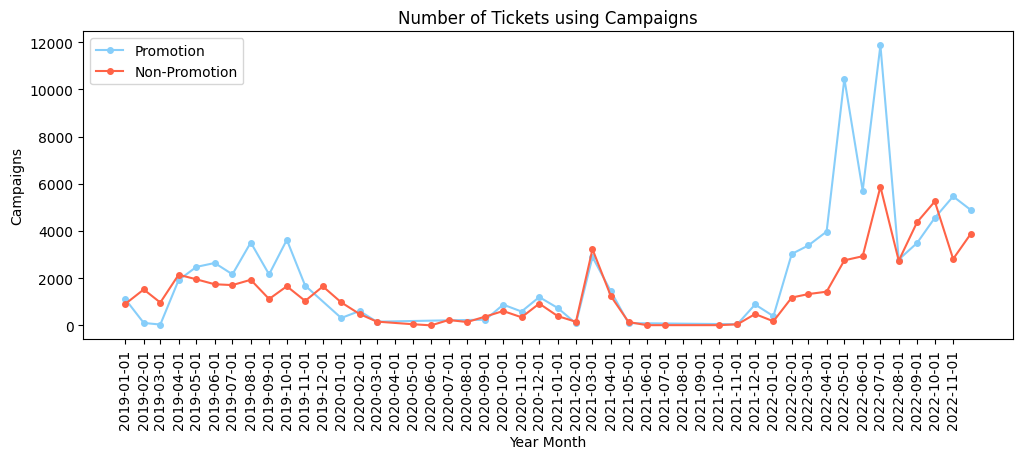

In [ ]:
#Vẽ line chart của 2 đường này
plt.figure(figsize=(12,4))

#Khai báo data
df_pro = df_promotion_1[df_promotion_1['campaign_type']=='Promotion']
df_non_pro = df_promotion_1[df_promotion_1['campaign_type']=='Non-Promotion']

plt.plot(df_pro['year_month'],
         df_pro['no_of_tickets'],
         label = 'Promotion',
         marker = 'o',
         markersize =4,
         color='lightskyblue',
         linewidth=1.5)

plt.plot(df_non_pro['year_month'],
         df_non_pro['no_of_tickets'],
         label = 'Non-Promotion',
         marker = 'o',
         markersize =4,
         color='tomato',
         linewidth=1.5)

plt.title('Number of Tickets using Campaigns')
plt.xlabel('Year Month')
plt.ylabel('Campaigns')
plt.legend()

#Set lại cho trục x hiện đầy đủ giá trị năm tháng
x_values = pd.date_range(start='2019-01', end='2022-12', freq='M').strftime('%Y-%m').tolist()
plt.xticks(x_values, rotation=90)
plt.show()

In [ ]:
df_promotion_2 = df_join_all.groupby('campaign_type').agg(no_of_tickets=('ticket_id','count')).sort_values(by='no_of_tickets').reset_index()
df_promotion_2

campaign_type  no_of_tickets
0  Non-Promotion          63098
1      Promotion          91627

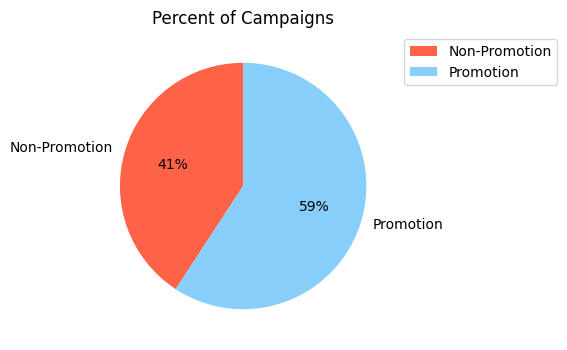

In [ ]:
#Vẽ pie chart
plt.figure(figsize=(8,4))

plt.pie(df_promotion_2['no_of_tickets'],
        labels=df_promotion_2['campaign_type'],
        autopct='%1.0f%%',
         startangle=90,
        colors=df_promotion_2['campaign_type'].replace({'Promotion':'lightskyblue','Non-Promotion':'tomato'}))

plt.title('Percent of Campaigns')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()



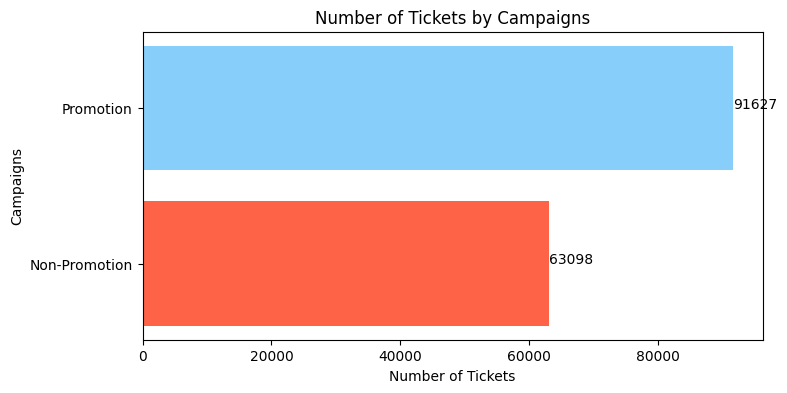

In [ ]:
#Vẽ bar chart ngang
plt.figure(figsize=(8,4))

plt.barh(df_promotion_2['campaign_type'],
         df_promotion_2['no_of_tickets'],
         color=df_promotion_2['campaign_type'].replace({'Promotion':'lightskyblue','Non-Promotion':'tomato'}))

plt.title('Number of Tickets by Campaigns')
plt.ylabel('Campaigns')
plt.xlabel('Number of Tickets')

for index, value in enumerate(df_promotion_2['no_of_tickets']):
  plt.text(value, index, str(value))


In [ ]:
df_promotion_1.head(5)

year_month  campaign_type  no_of_tickets
0 2019-01-01  Non-Promotion            914
1 2019-01-01      Promotion           1105
2 2019-02-01  Non-Promotion           1522
3 2019-02-01      Promotion            104
4 2019-03-01  Non-Promotion            968

In [ ]:
#Pivot table
df_promotion_3 =  df_promotion_1.pivot_table(index='year_month',columns='campaign_type',values='no_of_tickets').reset_index()
df_promotion_3.head(5)

campaign_type year_month  Non-Promotion  Promotion
0             2019-01-01          914.0     1105.0
1             2019-02-01         1522.0      104.0
2             2019-03-01          968.0       36.0
3             2019-04-01         2148.0     1921.0
4             2019-05-01         1952.0     2478.0

In [ ]:
#Tạo bảng dạng %
df_promotion_4 = df_promotion_3.fillna(0)
df_promotion_4['total'] = df_promotion_3.iloc[:,1:].sum(axis=1)

#Tính %
for i in df_promotion_4.columns[1:3]:
  df_promotion_4[i+'_pct']= df_promotion_4[i]/df_promotion_4['total']
df_promotion_4.head(5)

campaign_type year_month  Non-Promotion  Promotion   total  Non-Promotion_pct  \
0             2019-01-01          914.0     1105.0  2019.0           0.452699   
1             2019-02-01         1522.0      104.0  1626.0           0.936039   
2             2019-03-01          968.0       36.0  1004.0           0.964143   
3             2019-04-01         2148.0     1921.0  4069.0           0.527894   
4             2019-05-01         1952.0     2478.0  4430.0           0.440632   

campaign_type  Promotion_pct  
0                   0.547301  
1                   0.063961  
2                   0.035857  
3                   0.472106  
4                   0.559368

<ipython-input-946-13943c73589c>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  x_values = pd.date_range(start='2019-01', end='2022-12', freq='M').strftime('%Y-%m').tolist()


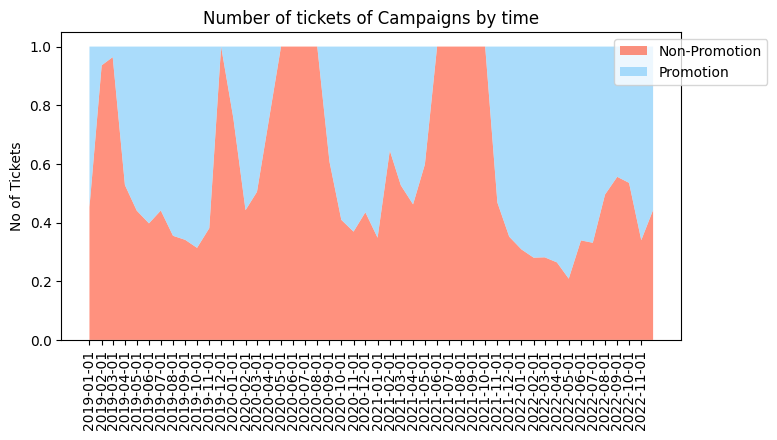

In [ ]:
#Vẽ biểu đồ miền 100%
plt.figure(figsize=(8,4))

plt.stackplot(df_promotion_4['year_month'],
              df_promotion_4['Non-Promotion_pct'],
              df_promotion_4['Promotion_pct'],
              labels = ['Non-Promotion','Promotion'],
              colors=['tomato','lightskyblue'],
              alpha=0.7
)
plt.title('Number of tickets of Campaigns by time')
plt.ylabel('No of Tickets')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

#Set lại cho trục x hiện đầy đủ giá trị năm tháng
x_values = pd.date_range(start='2019-01', end='2022-12', freq='M').strftime('%Y-%m').tolist()
plt.xticks(x_values, rotation=90)
plt.show()

Notes: Ở những khoảng thời gian không có dữ liệu thì tỉ lệ Non-Promotion chiếm 100%

#### **Combined view of 4 charts**

<ipython-input-947-cefd269b72c6>:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  x_values = pd.date_range(start='2019-01', end='2022-12', freq='M').strftime('%Y-%m').tolist()
<ipython-input-947-cefd269b72c6>:72: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  x_values = pd.date_range(start='2019-01', end='2022-12', freq='M').strftime('%Y-%m').tolist()


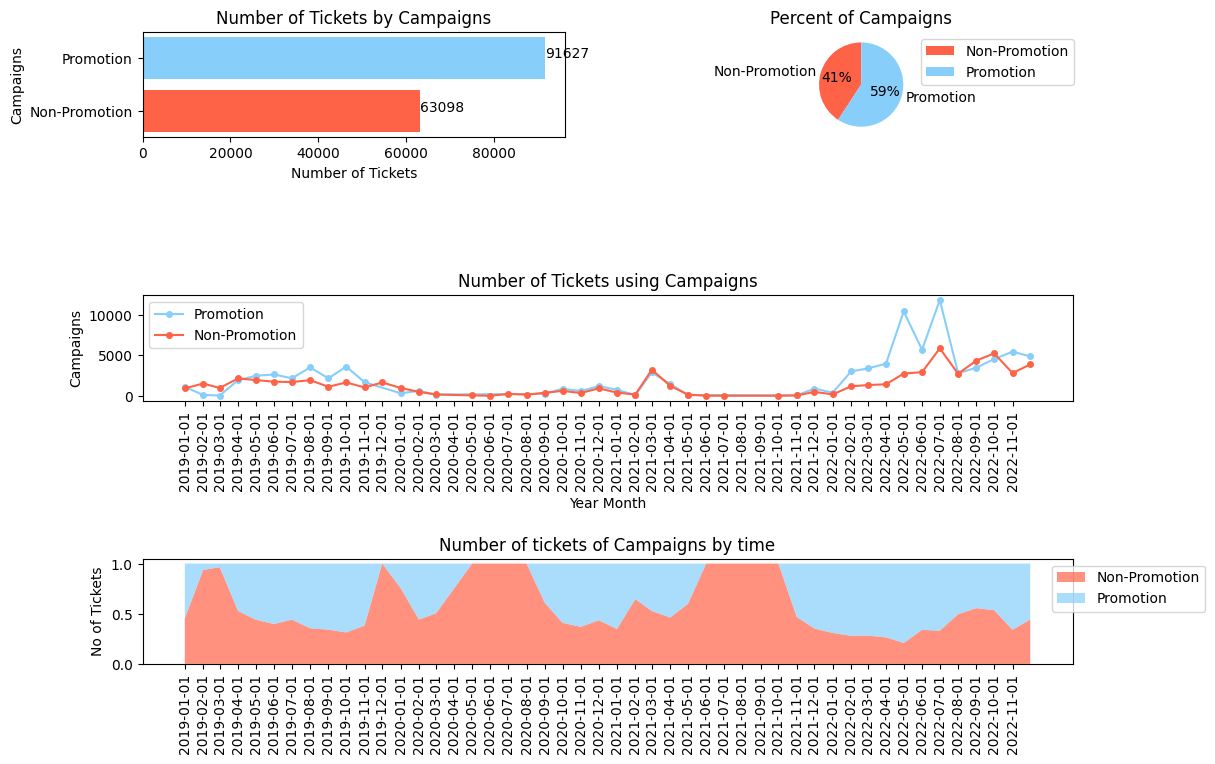

In [ ]:
plt.figure(figsize=(12,8))
#Vẽ bar chart ngang
ax1=plt.subplot(3,2,1)
plt.barh(df_promotion_2['campaign_type'],
         df_promotion_2['no_of_tickets'],
         color=df_promotion_2['campaign_type'].replace({'Promotion':'lightskyblue','Non-Promotion':'tomato'}))

plt.title('Number of Tickets by Campaigns')
plt.ylabel('Campaigns')
plt.xlabel('Number of Tickets')


for index, value in enumerate(df_promotion_2['no_of_tickets']):
  plt.text(value, index, str(value))

#Vẽ pie chart
ax2=plt.subplot(3,2,2)
plt.pie(df_promotion_2['no_of_tickets'],
        labels=df_promotion_2['campaign_type'],
        autopct='%1.0f%%',
         startangle=90,
        colors=df_promotion_2['campaign_type'].replace({'Promotion':'lightskyblue','Non-Promotion':'tomato'}))

plt.title('Percent of Campaigns')
plt.legend(bbox_to_anchor=(1, 1))

#Vẽ line chart của 2 đường này
ax3=plt.subplot(3,1,2)
#Khai báo data
df_pro = df_promotion_1[df_promotion_1['campaign_type']=='Promotion']
df_non_pro = df_promotion_1[df_promotion_1['campaign_type']=='Non-Promotion']

plt.plot(df_pro['year_month'],
         df_pro['no_of_tickets'],
         label = 'Promotion',
         marker = 'o',
         markersize =4,
         color='lightskyblue',
         linewidth=1.5)

plt.plot(df_non_pro['year_month'],
         df_non_pro['no_of_tickets'],
         label = 'Non-Promotion',
         marker = 'o',
         markersize =4,
         color='tomato',
         linewidth=1.5)

plt.title('Number of Tickets using Campaigns')
plt.xlabel('Year Month')
plt.ylabel('Campaigns')
plt.legend()

#Set lại cho trục x hiện đầy đủ giá trị năm tháng
x_values = pd.date_range(start='2019-01', end='2022-12', freq='M').strftime('%Y-%m').tolist()
plt.xticks(x_values, rotation=90)

#Bước 3: Vẽ biểu đồ miền 100%
ax4=plt.subplot(3,1,3)
plt.stackplot(df_promotion_4['year_month'],
              df_promotion_4['Non-Promotion_pct'],
              df_promotion_4['Promotion_pct'],
              labels = ['Non-Promotion','Promotion'],
              colors=['tomato','lightskyblue'],
              alpha=0.7
)
plt.title('Number of tickets of Campaigns by time')
plt.ylabel('No of Tickets')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

#Set lại cho trục x hiện đầy đủ giá trị năm tháng
x_values = pd.date_range(start='2019-01', end='2022-12', freq='M').strftime('%Y-%m').tolist()
plt.xticks(x_values, rotation=90)

#Show
plt.subplots_adjust(hspace = 1.5, top = 0.9)
plt.show()


### **Which movies they watched ?**

In [ ]:
#Xét trong các trường hợp thành công
df_movie_1 = df_join_all[df_join_all['status_id']==1].groupby('movie_name').agg(no_of_tickets=('ticket_id','count'),
                                                   total_cus=('customer_id','nunique'), #Vì 1 khách hàng có thể mua nhiều vé
                                                   total_revenue=('final_price','sum')).sort_values(by='no_of_tickets',ascending=False).reset_index()
df_movie_1.head(5) #In ra top 5 bộ phim có lượng bán vé ra lớn nhất

movie_name  no_of_tickets  total_cus  \
0  Doctor Strange In The Multiverse Of Madness           8615       8409   
1                     Minions: The Rise Of Gru           7224       7014   
2                     Avatar: The Way Of Water           5870       5612   
3                       Thor: Love And Thunder           5589       5478   
4                                    Peninsula           5499       5365   

   total_revenue  
0       65579.98  
1       56530.93  
2       59830.95  
3       43372.90  
4       41208.44

Notes: Vì số lượng phim rất nhiều, nên dưới đây chỉ phân tích theo thời gian của tất cả các bộ  phim bán ra có số lượng vé trên 1000

In [ ]:
#In ra tên các bộ phim có lượng vé hơn 1000
list_movie_name = df_movie_1[df_movie_1['no_of_tickets']>=1000]['movie_name'].unique()

In [ ]:
#Chuyển dạng trên thành List
selected_list_movie=list(list_movie_name)
selected_list_movie

['Doctor Strange In The Multiverse Of Madness',
 'Minions: The Rise Of Gru',
 'Avatar: The Way Of Water',
 'Thor: Love And Thunder',
 'Peninsula',
 'Black Panther 2: Wakanda Forever',
 'Black Adam',
 'Avengers: Endgame',
 "Dad I'm Sorry",
 'Love Destiny',
 'You And Trinh',
 'Fast & Furious Presents: Hobbs & Shaw',
 'Emergency Declaration',
 'Jurassic World Dominion',
 'Godzilla Vs. Kong',
 'Detective Conan: The Bride Of Halloween',
 'Joker',
 'Spider-Man: No Way Home',
 'Batman',
 'Blood Moon Party',
 'Fantastic Beasts: Secrets Of Dumbledore',
 'Top Gun: Maverick',
 'Naked Truth',
 "Doraemon: Nobita's Little Star Wars 2021",
 'One Piece Film: Red',
 'Confidential Assignment 2: International',
 'Extremely Easy Job',
 'Morbius',
 'Spider-Man Far From Home',
 'Maleficent',
 'Face Off: 48h',
 'Parasite']

In [ ]:
df_movie_2 = df_join_all[(df_join_all['status_id']==1) & df_join_all['movie_name'].isin(selected_list_movie)].groupby(['year_month','movie_name']).agg(no_of_tickets=('ticket_id','count')).reset_index()
df_movie_2.head(4)

year_month         movie_name  no_of_tickets
0    2019-04  Avengers: Endgame           2081
1    2019-05  Avengers: Endgame           1130
2    2019-06  Avengers: Endgame              8
3    2019-06           Parasite            751

In [ ]:
#Pivot Table
df_movie_3 = df_movie_2.pivot_table(index='year_month',columns='movie_name',values='no_of_tickets').reset_index()
df_movie_3.head(5)

movie_name year_month  Avatar: The Way Of Water  Avengers: Endgame  Batman  \
0             2019-04                       NaN             2081.0     NaN   
1             2019-05                       NaN             1130.0     NaN   
2             2019-06                       NaN                8.0     NaN   
3             2019-07                       NaN                NaN     NaN   
4             2019-08                       NaN                NaN     NaN   

movie_name  Black Adam  Black Panther 2: Wakanda Forever  Blood Moon Party  \
0                  NaN                               NaN               NaN   
1                  NaN                               NaN               NaN   
2                  NaN                               NaN               NaN   
3                  NaN                               NaN               NaN   
4                  NaN                               NaN               NaN   

movie_name  Confidential Assignment 2: International  Dad I'm Sorry  \
0                                                NaN            NaN   
1                                                NaN            NaN   
2                                                NaN            NaN   
3                                                NaN            NaN   
4                                                NaN            NaN   

movie_name  Detective Conan: The Bride Of Halloween  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

movie_name  Doctor Strange In The Multiverse Of Madness  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   

movie_name  Doraemon: Nobita's Little Star Wars 2021  Emergency Declaration  \
0                                                NaN                    NaN   
1                                                NaN                    NaN   
2                                                NaN                    NaN   
3                                                NaN                    NaN   
4                                                NaN                    NaN   

movie_name  Extremely Easy Job  Face Off: 48h  \
0                          NaN            NaN   
1                          NaN            NaN   
2                          NaN            NaN   
3                          NaN            NaN   
4                          NaN            NaN   

movie_name  Fantastic Beasts: Secrets Of Dumbledore  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

movie_name  Fast & Furious Presents: Hobbs & Shaw  Godzilla Vs. Kong  Joker  \
0                                             NaN                NaN    NaN   
1                                             NaN                NaN    NaN   
2                                             NaN                NaN    NaN   
3                                           126.0                NaN    NaN   
4                                          1950.0                NaN    NaN   

movie_name  Jurassic World Dominion  Love Destiny  Maleficent  \
0                               NaN           NaN         NaN   
1                               NaN           NaN         NaN   
2                               NaN           NaN         NaN   
3                               NaN           NaN         NaN   
4                               NaN           Na

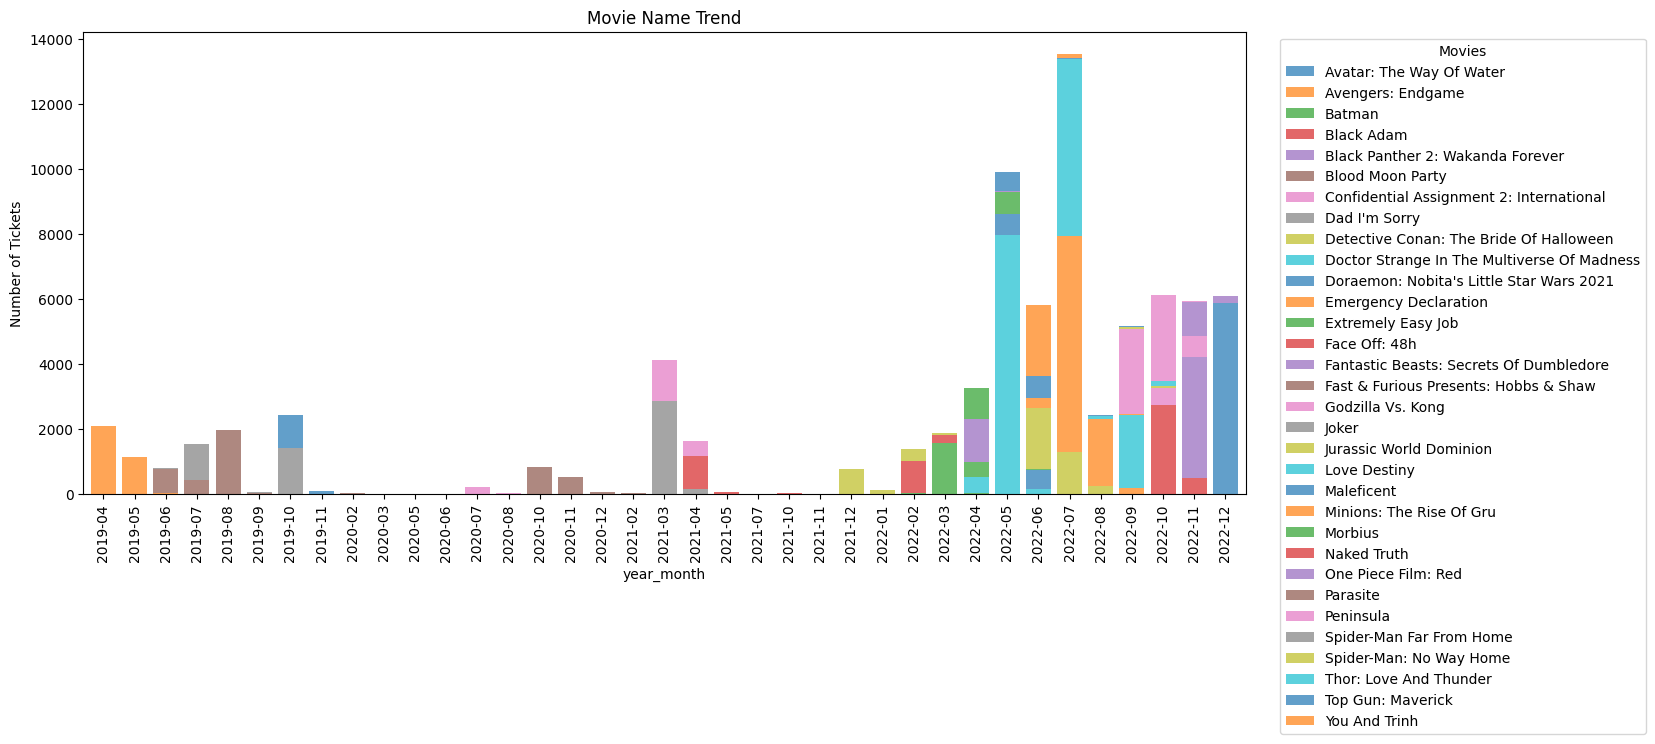

In [ ]:
#Vẽ biểu đồ chồng
ax = df_movie_3.plot(x='year_month', kind='bar',stacked='True',figsize=(15,6),width=0.8, alpha=0.7)

ax.set_title('Movie Name Trend')
ax.set_ylabel('Number of Tickets')

plt.legend(title='Movies', loc='upper right', bbox_to_anchor=(1.35, 1))

plt.show()

In [ ]:
#TOP 5 bộ phim có số lượng vé bán ra nhiều nhất
df_movie_2.sort_values(by='no_of_tickets', ascending=False).head(5)

year_month                                   movie_name  no_of_tickets
53     2022-05  Doctor Strange In The Multiverse Of Madness           7973
70     2022-07                     Minions: The Rise Of Gru           6648
100    2022-12                     Avatar: The Way Of Water           5870
71     2022-07                       Thor: Love And Thunder           5471
95     2022-11             Black Panther 2: Wakanda Forever           3742

Notes: Xem thêm top 2 bộ phim có số vé bán ra lớn nhất trong mỗi năm

In [ ]:
df_join_all['year'] = pd.to_datetime(df_join_all['time']).dt.year

# Lấy Top 2 bộ phim có doanh thu cao nhất mỗi năm
top_movies_each_year = df_join_all.groupby('year').apply(lambda x: x.nlargest(2, 'final_price')).reset_index(drop=True)

# Hiển thị kết quả
top_movies_each_year[['ticket_id','year','year_month','movie_name','final_price']]

<ipython-input-955-6a6d28dbf378>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_movies_each_year = df_join_all.groupby('year').apply(lambda x: x.nlargest(2, 'final_price')).reset_index(drop=True)


ticket_id  year year_month  \
0  0bb289281a7a62b86253937a2415d9d1  2019    2019-04   
1  57b14cb0c347a6ac585aa0b894fb70ae  2019    2019-09   
2  b3489199654e3c1fecd26695e7336eae  2020    2020-10   
3  90ca82309b0277d93b24786c6909cd19  2020    2020-01   
4  c08c38cc9e6f994a199544ad2d51b69a  2021    2021-03   
5  bc676b7af7f4892a3b83c6cdf0278b09  2021    2021-03   
6  0acaccd3ca2f31e9e0725c3798ca3557  2022    2022-11   
7  f6a2c75a522ae79adad206df5c215e3d  2022    2022-07   

                         movie_name  final_price  
0                 Avengers: Endgame        74.23  
1                              Anna        74.23  
2                              Pawn        64.05  
3                   The Royal Bride        57.65  
4                 Godzilla Vs. Kong        74.89  
5                 Godzilla Vs. Kong        74.23  
6  Black Panther 2: Wakanda Forever        92.91  
7            Thor: Love And Thunder        86.60

## **3.4. Customer value dimension**

> **Mục tiêu: Phân tích các chỉ số về giá trị mà 1 khách hàng mang lại**
>> + **Frequency:** count, day, month
>> + **Monetary:** total_money, total_discount
>> + **Success rate** = number_success/total_success
>> + **Discount_rate** = sum_discount/sum_money

In [ ]:
#Set data chạy hết tất cả các cột trong data
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
df_join_all.head(4)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   
2  1fdbeb7eceba8a27d9d985b5b70c219a       100596  money in app          56.0   
3  7715c9955866bd296b98543412839abd       100852  bank account         119.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   
2  69cf9244654949047f006e441fa7a8a7           10.31            2.31   
3  879ed11af9d6d2b5cda4d299590735a7           27.75            1.03   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   
2         8.00 2022-07-30 11:16:55.483          1            0   
3        26.72 2022-07-04 22:33:07.458          1        85940   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   
2  Thor: Love And Thunder       Male 1989-05-18  Order successful     unknown   
3  Thor: Love And Thunder       Male 1997-08-31  Order successful     unknown   

              type        model platform        age  Month  Hour  Day Name  \
0  direct discount   iPhone13,1   mobile  36.013689      7    17    Friday   
1  direct discount      browser  website  33.730322      7    20    Friday   
2          unknown      unknown   mobile  35.789185      7    11  Saturday   
3  direct discount  devicemodel   mobile  27.501711      7    22    Monday   

  year_month  Dayofweek        os_version  campaign_type  year  
0    2022-07          4               ios      Promotion  2022  
1    2022-07          4           browser      Promotion  2022  
2    2022-07          5           unknown  Non-Promotion  2022  
3    2022-07          0  android & others      Promotion  2022

In [ ]:
#In ra thông tin xem mỗi khách hàng mua tổng bao nhiêu vé và số lượng ngày, tháng

#Thêm cột ngày vào bảng df_join_all
df_join_all['Date']=df_join_all['time'].dt.strftime('%Y-%m-%d')

df_join_all.head(4)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   
2  1fdbeb7eceba8a27d9d985b5b70c219a       100596  money in app          56.0   
3  7715c9955866bd296b98543412839abd       100852  bank account         119.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   
2  69cf9244654949047f006e441fa7a8a7           10.31            2.31   
3  879ed11af9d6d2b5cda4d299590735a7           27.75            1.03   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   
2         8.00 2022-07-30 11:16:55.483          1            0   
3        26.72 2022-07-04 22:33:07.458          1        85940   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   
2  Thor: Love And Thunder       Male 1989-05-18  Order successful     unknown   
3  Thor: Love And Thunder       Male 1997-08-31  Order successful     unknown   

              type        model platform        age  Month  Hour  Day Name  \
0  direct discount   iPhone13,1   mobile  36.013689      7    17    Friday   
1  direct discount      browser  website  33.730322      7    20    Friday   
2          unknown      unknown   mobile  35.789185      7    11  Saturday   
3  direct discount  devicemodel   mobile  27.501711      7    22    Monday   

  year_month  Dayofweek        os_version  campaign_type  year        Date  
0    2022-07          4               ios      Promotion  2022  2022-07-08  
1    2022-07          4           browser      Promotion  2022  2022-07-15  
2    2022-07          5           unknown  Non-Promotion  2022  2022-07-30  
3    2022-07          0  android & others      Promotion  2022  2022-07-04

In [ ]:
#Tạo Table 1 cho nhóm khách hàng thành công

#Bổ sung thêm function tính các giao dịch thành công
def cal_n_promotion(x):
  return(x=='Promotion').sum()

df_success_metric = df_join_all[df_join_all['status_id']==1].groupby('customer_id').agg(n_success=('ticket_id','count'),
                                                  no_of_months=('year_month','nunique'),
                                                  total_money=('original_price','sum'),
                                                  total_discount=('discount_value','sum'),
                                                  total_promotion=('campaign_type',cal_n_promotion),
                                                  no_of_days=('Date','nunique')).reset_index()
df_success_metric.head(5)

customer_id  n_success  no_of_months  total_money  total_discount  \
0       100001          1             1         7.42            2.06   
1       100003          6             6        60.95            2.56   
2       100004          1             1        32.25            0.00   
3       100005          1             1         9.49            2.06   
4       100006          1             1        12.37            0.00   

   total_promotion  no_of_days  
0                1           1  
1                1           6  
2                0           1  
3                1           1  
4                0           1

In [ ]:
calc_null_rate(df_success_metric)

null_count  null_rate
customer_id               0        0.0
n_success                 0        0.0
no_of_months              0        0.0
total_money               0        0.0
total_discount            0        0.0
total_promotion           0        0.0
no_of_days                0        0.0

In [ ]:
#Tạo Table 2 cho nhóm khách hàng thanh toán thất bại

def cal_no_success(x):
  return(x!=1).sum() #Tính số giao dịch không thành công => tính tỉ lệ giao dịch không thành công

df_failed_metric = df_join_all.groupby('customer_id').agg(no_of_tickets=('ticket_id','count'),
                                                           n_failed=('status_id',cal_no_success)).reset_index()

df_failed_metric.head(5)

customer_id  no_of_tickets  n_failed
0       100001              1         0
1       100003              6         0
2       100004              1         0
3       100005              1         0
4       100006              1         0

In [ ]:
#BMerge 2 tables ở trên lại với nhau
df_value_1 = pd.merge(df_failed_metric, df_success_metric,how='left',on='customer_id').fillna(0)
df_value_1.head(5)

customer_id  no_of_tickets  n_failed  n_success  no_of_months  total_money  \
0       100001              1         0        1.0           1.0         7.42   
1       100003              6         0        6.0           6.0        60.95   
2       100004              1         0        1.0           1.0        32.25   
3       100005              1         0        1.0           1.0         9.49   
4       100006              1         0        1.0           1.0        12.37   

   total_discount  total_promotion  no_of_days  
0            2.06              1.0         1.0  
1            2.56              1.0         6.0  
2            0.00              0.0         1.0  
3            2.06              1.0         1.0  
4            0.00              0.0         1.0

In [ ]:
#Tính thêm các chỉ số còn thiếu
df_value_1['success_rate']=df_value_1['n_success']/df_value_1['no_of_tickets'] #Tỉ lệ vé đặt thành công = Tổng ticket_id thành công/ Tổng số ticket_id vé
df_value_1['promotion_rate']=df_value_1['total_promotion']/df_value_1['n_success'] #Tỉ lệ đặt hàng có KM=Tổng đơn hàng có KM/ Tổng số đơn hàng đặt thành công
df_value_1['discount_rate']=df_value_1['total_discount']/df_value_1['total_money'] #Tỉ lệ được discount= Số tiền discount/ Tổng tiền chi cho tất cả các đơn hàng
df_value_1.head(5)


customer_id  no_of_tickets  n_failed  n_success  no_of_months  total_money  \
0       100001              1         0        1.0           1.0         7.42   
1       100003              6         0        6.0           6.0        60.95   
2       100004              1         0        1.0           1.0        32.25   
3       100005              1         0        1.0           1.0         9.49   
4       100006              1         0        1.0           1.0        12.37   

   total_discount  total_promotion  no_of_days  success_rate  promotion_rate  \
0            2.06              1.0         1.0           1.0        1.000000   
1            2.56              1.0         6.0           1.0        0.166667   
2            0.00              0.0         1.0           1.0        0.000000   
3            2.06              1.0         1.0           1.0        1.000000   
4            0.00              0.0         1.0           1.0        0.000000   

   discount_rate  
0       0.277628  
1       0.042002  
2       0.000000  
3       0.217071  
4       0.000000

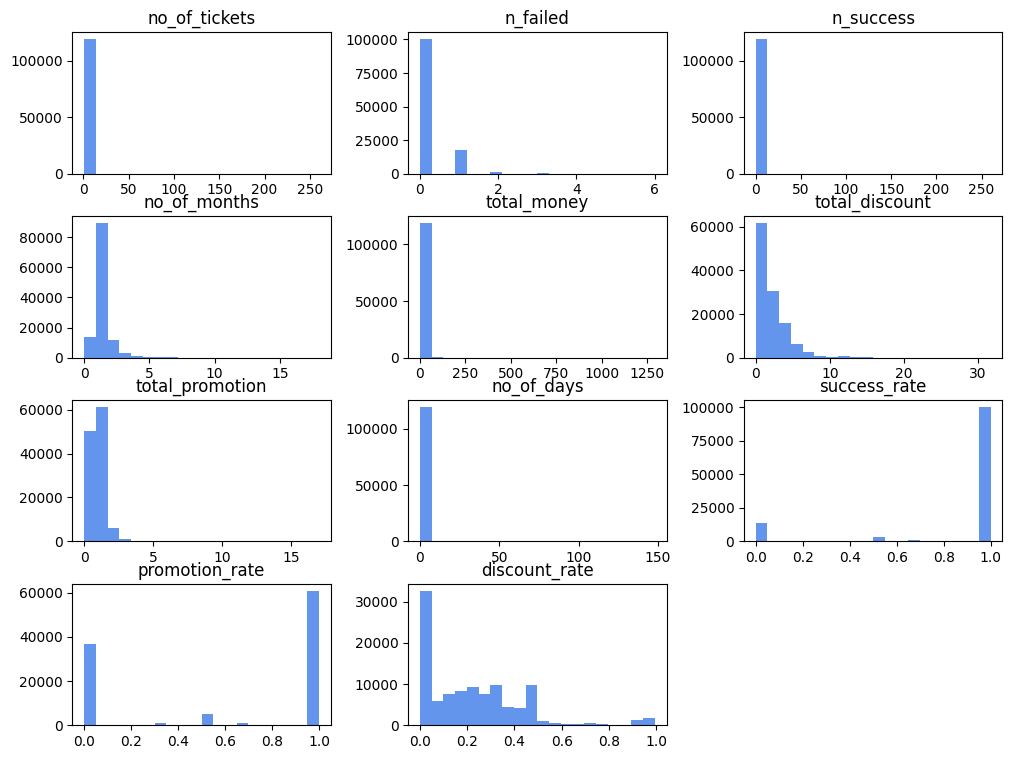

In [ ]:
#Vẽ Charts ra để xem tổng quan của các chỉ số trên
df_value_1.iloc[:,1:].hist(figsize=(12,9),grid=False,color='cornflowerblue', bins=20)
plt.show()

**Notes:**
+ Hầu hết khách hàng mua vé rất ít (1-2 vé) nhưng có top những người mua rất nhiều -> check những người này
+ **success_rate:** Có khoảng ~10% giao dịch Success Rate = 0% -> Lỗi ?
+ **promotion_rate:** Có hơn 6000 khách hàng chỉ tham gia promotin (rate =100%)
+ Có 6000 khách hàng chỉ hưởng promotion 1 lần (có liên quan gì đến nhóm ở promotion_rate=100%) không ?

### **Frequency & anomaly behavior**

In [ ]:
df_value_1.head(2)

customer_id  no_of_tickets  n_failed  n_success  no_of_months  total_money  \
0       100001              1         0        1.0           1.0         7.42   
1       100003              6         0        6.0           6.0        60.95   

   total_discount  total_promotion  no_of_days  success_rate  promotion_rate  \
0            2.06              1.0         1.0           1.0        1.000000   
1            2.56              1.0         6.0           1.0        0.166667   

   discount_rate  
0       0.277628  
1       0.042002

In [ ]:
df_value_1['customers_dis'] = df_value_1['n_success'].apply(lambda x:'more than 10' if x>=10
                                                                 else str(x))
df_value_1.head(2)

customer_id  no_of_tickets  n_failed  n_success  no_of_months  total_money  \
0       100001              1         0        1.0           1.0         7.42   
1       100003              6         0        6.0           6.0        60.95   

   total_discount  total_promotion  no_of_days  success_rate  promotion_rate  \
0            2.06              1.0         1.0           1.0        1.000000   
1            2.56              1.0         6.0           1.0        0.166667   

   discount_rate customers_dis  
0       0.277628           1.0  
1       0.042002           6.0

In [ ]:
# Tương ứng với số lượng vé như thế thì có bao nhiêu customer mua?
df_value_2 = df_value_1.groupby('customers_dis').agg(no_of_customers=('customer_id','count')).reset_index()
df_value_2

customers_dis  no_of_customers
0            0.0            13701
1            1.0            87921
2            2.0            12902
3            3.0             3145
4            4.0             1017
5            5.0              380
6            6.0              168
7            7.0               92
8            8.0               47
9            9.0               30
10  more than 10               74

Notes: Vì số lượng khách mua số lượng vé lớn cỡ từ 1-3 người => Gộp luôn vào nhóm (more than 10: mua nhiều hơn 10 vé)

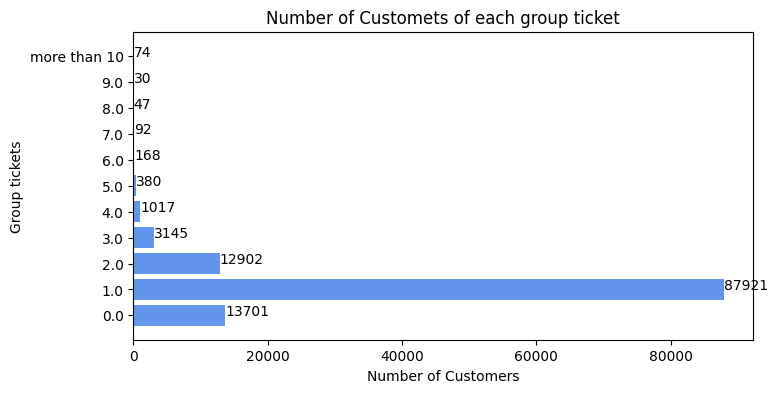

In [ ]:
# Vẽ biểu đồ cột ngang

plt.figure(figsize=(8,4))

plt.barh(df_value_2['customers_dis'],
         df_value_2['no_of_customers'],
         color='cornflowerblue')

plt.title('Number of Customets of each group ticket')
plt.ylabel('Group tickets')
plt.xlabel('Number of Customers')

for index, value in enumerate(df_value_2['no_of_customers']):
  plt.text(value, index, str(value))


In [ ]:
df_value_1.count()

customer_id        119477
no_of_tickets      119477
n_failed           119477
n_success          119477
no_of_months       119477
total_money        119477
total_discount     119477
total_promotion    119477
no_of_days         119477
success_rate       119477
promotion_rate     105776
discount_rate      105776
customers_dis      119477
dtype: int64

Notes: Có tổng cộng là 119477 khách hàng, trong đó:
+ Có 87921 khách hàng thuộc nhóm chỉ mua 1 vé (chiếm 73,58%)
+ Có 13,4 % khách hàng mua từ 2-3 vé
+ Còn lại số lượng mua vé nhiều rất ít -> Tuy nhiên cũng cần phải làm rõ nhóm này
> + Nếu họ mua dồn vào 1 lúc -> có thể có hiện tượng ôm vé -> bất thường
> + Nếu họ mua dàn trải, qua thời gian khác nhau -> Bình thường

In [ ]:
# Số lượng vé được mua top 5 nhiều nhất:
df_value_3 = df_value_1.groupby('n_success').agg(no_of_customers=('customer_id','count')).sort_values(by='n_success',ascending=False).reset_index()
df_value_3.head(5)

n_success  no_of_customers
0      260.0                1
1      107.0                1
2      104.0                1
3      103.0                1
4       80.0                1

Notes:
+ Có 1 người mua nhiều nhất tận 260 vé
+ Có 4 người mua cỡ 100-110 vé

In [ ]:
# Chuyển thành dạng List
df_value_4 = list(df_value_1[df_value_1['n_success']>30]['customer_id'].unique())
df_value_4

[102948,
 103035,
 103347,
 108110,
 108162,
 108729,
 111644,
 114205,
 117140,
 117362,
 117475,
 118349,
 122962,
 131905,
 153124,
 153588,
 158089,
 168132,
 179471,
 222641,
 226527,
 226886]

In [ ]:
df_value_5 = df_join_all[(df_join_all['status_id']==1) & df_join_all['customer_id'].isin(df_value_4)].groupby(['year_month','customer_id']).agg(no_of_tickets=('ticket_id','count')).reset_index()
df_value_5.head(10)

year_month  customer_id  no_of_tickets
0    2019-01       108162              1
1    2019-01       114205              1
2    2019-02       108162              1
3    2019-02       114205              2
4    2019-03       114205              1
5    2019-04       103035              3
6    2019-04       108162              1
7    2019-04       131905              3
8    2019-04       153124              2
9    2019-04       158089              3

In [ ]:
# Pivot table
df_value_6 = df_value_5.pivot_table(index='year_month',columns='customer_id',values='no_of_tickets').reset_index()
df_value_6.head(5)

customer_id year_month  102948  103035  103347  108110  108162  108729  \
0              2019-01     NaN     NaN     NaN     NaN     1.0     NaN   
1              2019-02     NaN     NaN     NaN     NaN     1.0     NaN   
2              2019-03     NaN     NaN     NaN     NaN     NaN     NaN   
3              2019-04     NaN     3.0     NaN     NaN     1.0     NaN   
4              2019-05     NaN     2.0     NaN     NaN     4.0     NaN   

customer_id  111644  114205  117140  117362  117475  118349  122962  131905  \
0               NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
1               NaN     2.0     NaN     NaN     NaN     NaN     NaN     NaN   
2               NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
3               NaN     NaN     NaN     NaN     NaN     NaN     NaN     3.0   
4               NaN     NaN     1.0     NaN     NaN     1.0     NaN     2.0   

customer_id  153124  153588  158089  168132  179471  222641  226527  226886  
0               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3               2.0     NaN     3.0     NaN     NaN     NaN     NaN     NaN  
4               3.0     NaN     7.0     NaN     NaN     NaN     NaN     NaN

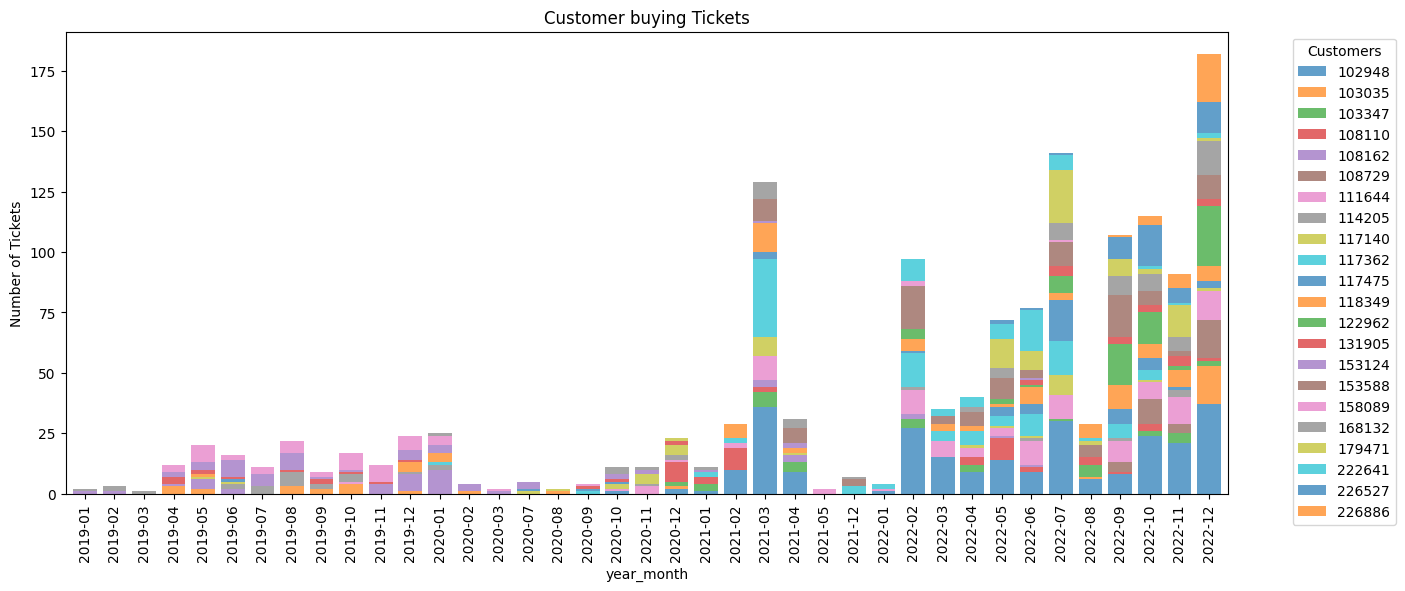

In [ ]:
# Vẽ Chart

ax = df_value_6.plot(x='year_month', kind='bar',stacked='True',figsize=(15,6),width=0.8, alpha=0.7)

ax.set_title('Customer buying Tickets')
ax.set_ylabel('Number of Tickets')

plt.legend(title='Customers', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

Notes:
+ Nhóm khách hàng mua vé >= 30 lượt phân bố dàn trải -> Không có hiện tượng spam vé, mua đi bán lại
+ Chưa có gì bất thường

### **Promotion's Campaigns**

In [ ]:
df_value_1.head(4)

customer_id  no_of_tickets  n_failed  n_success  no_of_months  total_money  \
0       100001              1         0        1.0           1.0         7.42   
1       100003              6         0        6.0           6.0        60.95   
2       100004              1         0        1.0           1.0        32.25   
3       100005              1         0        1.0           1.0         9.49   

   total_discount  total_promotion  no_of_days  success_rate  promotion_rate  \
0            2.06              1.0         1.0           1.0        1.000000   
1            2.56              1.0         6.0           1.0        0.166667   
2            0.00              0.0         1.0           1.0        0.000000   
3            2.06              1.0         1.0           1.0        1.000000   

   discount_rate customers_dis  
0       0.277628           1.0  
1       0.042002           6.0  
2       0.000000           1.0  
3       0.217071           1.0

In [ ]:
df_value_1['promotion_dis'] = df_value_1['total_promotion'].apply(lambda x:'more than 10' if x>=10 else str(x))
df_value_1

customer_id  no_of_tickets  n_failed  n_success  no_of_months  \
0            100001              1         0        1.0           1.0   
1            100003              6         0        6.0           6.0   
2            100004              1         0        1.0           1.0   
3            100005              1         0        1.0           1.0   
4            100006              1         0        1.0           1.0   
...             ...            ...       ...        ...           ...   
119472       231393              1         0        1.0           1.0   
119473       231395              1         0        1.0           1.0   
119474       231397              1         0        1.0           1.0   
119475       231398              1         0        1.0           1.0   
119476       231399              1         0        1.0           1.0   

        total_money  total_discount  total_promotion  no_of_days  \
0              7.42            2.06              1.0         1.0   
1             60.95            2.56              1.0         6.0   
2             32.25            0.00              0.0         1.0   
3              9.49            2.06              1.0         1.0   
4             12.37            0.00              0.0         1.0   
...             ...             ...              ...         ...   
119472        14.39            1.65              1.0         1.0   
119473         5.16            1.90              1.0         1.0   
119474        10.72            1.65              1.0         1.0   
119475        11.92            1.24              1.0         1.0   
119476         4.33            1.24              1.0         1.0   

        success_rate  promotion_rate  discount_rate customers_dis  \
0                1.0        1.000000       0.277628           1.0   
1                1.0        0.166667       0.042002           6.0   
2                1.0        0.000000       0.000000           1.0   
3                1.0        1.000000       0.217071           1.0   
4                1.0        0.000000       0.000000           1.0   
...              ...             ...            ...           ...   
119472           1.0        1.000000       0.114663           1.0   
119473           1.0        1.000000       0.368217           1.0   
119474           1.0        1.000000       0.153918           1.0   
119475           1.0        1.000000       0.104027           1.0   
119476           1.0        1.000000       0.286374           1.0   

       promotion_dis  
0                1.0  
1                1.0  
2                0.0  
3                1.0  
4                0.0  
...              ...  
119472           1.0  
119473           1.0  
119474           1.0  
119475           1.0  
119476           1.0  

[119477 rows x 14 columns]

In [ ]:
df_protype_2 = df_value_1.groupby('promotion_dis').agg(no_of_customers=('customer_id','count')).reset_index()
df_protype_2

promotion_dis  no_of_customers
0            0.0            50498
1            1.0            61334
2            2.0             6264
3            3.0             1042
4            4.0              230
5            5.0               74
6            6.0               19
7            7.0               10
8            8.0                2
9            9.0                2
10  more than 10                2

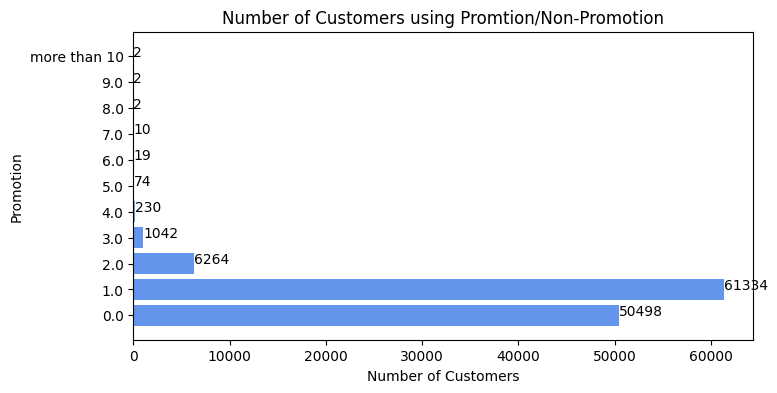

In [ ]:
# Vẽ biểu đồ cột ngang

plt.figure(figsize=(8,4))

plt.barh(df_protype_2['promotion_dis'],
         df_protype_2['no_of_customers'],
         color='cornflowerblue')

plt.title('Number of Customers using Promtion/Non-Promotion')
plt.ylabel('Promotion')
plt.xlabel('Number of Customers')

for index, value in enumerate(df_protype_2['no_of_customers']):
  plt.text(value, index, str(value))

In [ ]:
df_value_1['customer_id'].count()

119477

In [ ]:
#Tỉ lệ người tham gia không tham gia khuyến mãi lần nào:
50498/119477

0.4226587544046134

In [ ]:
#Tỉ lệ người tham gia có tham gia khuyến mãi (ít nhất là 1 lần):
(119477-50498)/119477

0.5773412455953866

In [ ]:
#Tỉ lệ người chỉ tham gia khuyến mãi 1 lần duy nhất:
61334/(119477-50498)

0.8891691674277679

Notes:
+ Có ~ 42% khách hàng không tham gia chương trình khuyến mãi nào
+ Có ~ 58% khách hàng join các chương trình khuyến mãi
+ Trong đó 89%% là chỉ hưởng khuyến mãi duy nhất
> Có 2 trường hợp xảy ra:
>> + 1. Khách hàng chỉ đến 1 lần rồi thôi
>> + 2. Các chương trình Promotion chỉ cho 1 người dùng 1 lần (dành cho new customers) => Phải verify lại với team Product hoặc Mkt

**Kiểm tra và đánh giá loại KM mà KH dùng**

In [ ]:
df_join_all['type'].unique()

array(['direct discount', 'unknown', 'voucher', 'reward point'],
      dtype=object)

In [ ]:
df_protype_0 = df_join_all[df_join_all['status_id']==1].groupby('type').agg(total=('ticket_id','count')).sort_values(by='total',ascending=False).reset_index()
df_protype_0

type  total
0  direct discount  68449
1          unknown  55156
2          voucher   6924
3     reward point   3150

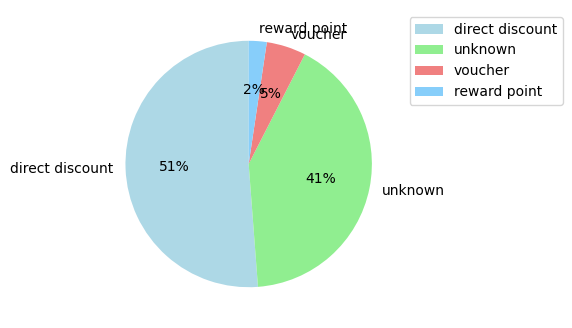

In [ ]:
#Xem tỉ trọng của các loại chương trình khuyến mãi trên

plt.figure(figsize=(8, 4))

plt.pie(df_protype_0['total'],
        labels=df_protype_0['type'],
        autopct='%1.0f%%',
        startangle=90,
        colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
)

plt.legend(bbox_to_anchor=(1, 1))
plt.show()


**Notes:**
+ Số lượng direct discount chiếm gần tới 90% nhưng trong nhóm khách hàng dùng 1 lần thì nhóm đó dùng loại promotion gì và chiếm bao nhiêu %

Notes: Muốn xem trong các promotion thì khách hàng thích dùng cái nào nhất trong số 3 loại: direct discount, voucher, reward point

**Tính tỷ lệ loại KM chi tiết cho từng nhóm khách hàng**

In [ ]:
df_typepro_3 = df_join_all[(df_join_all['campaign_type']=='Promotion') & df_join_all['status_id']==1].groupby('customer_id').agg(no_of_promotions=('ticket_id','count')).reset_index()
df_typepro_3.head(5)

customer_id  no_of_promotions
0       100001                 1
1       100003                 1
2       100005                 1
3       100007                 1
4       100009                 7

In [ ]:
df_typepro_1 = df_join_all[(df_join_all['campaign_type']=='Promotion') & df_join_all['status_id']==1].pivot_table(index='customer_id', columns='type',aggfunc='count',values='ticket_id').reset_index()
df_typepro_1 = df_typepro_1.fillna(0)
df_typepro_1.head(10)


type  customer_id  direct discount  reward point  voucher
0          100001              0.0           0.0      1.0
1          100003              1.0           0.0      0.0
2          100005              0.0           0.0      1.0
3          100007              1.0           0.0      0.0
4          100009              7.0           0.0      0.0
5          100010              1.0           0.0      0.0
6          100012              1.0           0.0      0.0
7          100014              2.0           0.0      0.0
8          100015              0.0           0.0      2.0
9          100018              1.0           0.0      0.0

In [ ]:
df_typepro_4 = pd.merge(df_typepro_3,df_typepro_1, how='inner', on='customer_id')
df_typepro_4.head(10)

customer_id  no_of_promotions  direct discount  reward point  voucher
0       100001                 1              0.0           0.0      1.0
1       100003                 1              1.0           0.0      0.0
2       100005                 1              0.0           0.0      1.0
3       100007                 1              1.0           0.0      0.0
4       100009                 7              7.0           0.0      0.0
5       100010                 1              1.0           0.0      0.0
6       100012                 1              1.0           0.0      0.0
7       100014                 2              2.0           0.0      0.0
8       100015                 2              0.0           0.0      2.0
9       100018                 1              1.0           0.0      0.0

In [ ]:
df_typepro_4 = df_typepro_4.drop_duplicates(subset=['customer_id'])

In [ ]:
df_typepro_5 = df_typepro_4.groupby('no_of_promotions').agg(no_customers=('customer_id','nunique'),
                                                            no_direct_discount=('direct discount','sum'),
                                                            no_reward_point=('reward point','sum'),
                                                            no_voucher=('voucher','sum')).reset_index()
df_typepro_5.head(12)

no_of_promotions  no_customers  no_direct_discount  no_reward_point  \
0                  1         66802             57826.0           3321.0   
1                  2          7889             14151.0            411.0   
2                  3          1437              3885.0             95.0   
3                  4           326              1185.0             16.0   
4                  5           106               479.0              6.0   
5                  6            26               147.0              0.0   
6                  7            10                57.0              0.0   
7                  8             6                40.0              2.0   
8                  9             2                12.0              0.0   
9                 10             2                19.0              0.0   
10                17             1                 0.0              0.0   

    no_voucher  
0       5655.0  
1       1216.0  
2        331.0  
3        103.0  
4         45.0  
5          9.0  
6         13.0  
7          6.0  
8          6.0  
9          1.0  
10        17.0

In [ ]:
#Thêm 1 cột tổng
df_typepro_5['total']=df_typepro_5.iloc[:,2:].sum(axis=1)
df_typepro_5

no_of_promotions  no_customers  no_direct_discount  no_reward_point  \
0                  1         66802             57826.0           3321.0   
1                  2          7889             14151.0            411.0   
2                  3          1437              3885.0             95.0   
3                  4           326              1185.0             16.0   
4                  5           106               479.0              6.0   
5                  6            26               147.0              0.0   
6                  7            10                57.0              0.0   
7                  8             6                40.0              2.0   
8                  9             2                12.0              0.0   
9                 10             2                19.0              0.0   
10                17             1                 0.0              0.0   

    no_voucher    total  
0       5655.0  66802.0  
1       1216.0  15778.0  
2        331.0   4311.0  
3        103.0   1304.0  
4         45.0    530.0  
5          9.0    156.0  
6         13.0     70.0  
7          6.0     48.0  
8          6.0     18.0  
9          1.0     20.0  
10        17.0     17.0

In [ ]:
for i in df_typepro_5.columns[2:5]:
  df_typepro_5[i+'_pct']= df_typepro_5[i]/df_typepro_5['total']

In [ ]:
df_typepro_5.head(2)

no_of_promotions  no_customers  no_direct_discount  no_reward_point  \
0                 1         66802             57826.0           3321.0   
1                 2          7889             14151.0            411.0   

   no_voucher    total  no_direct_discount_pct  no_reward_point_pct  \
0      5655.0  66802.0                0.865633             0.049714   
1      1216.0  15778.0                0.896882             0.026049   

   no_voucher_pct  
0        0.084653  
1        0.077069

**Tạo heatmap cho các chương trình khuyến mãi**:

In [ ]:
#Set lại format cho các số
format_dict = {'total':'{:.0f}','no_voucher_pct':'{:.0%}','no_direct_discount_pct':'{:.0%}','no_reward_point_pct':'{:.0%}'}

In [ ]:
#Tô màu heatmap
(
    df_typepro_5
    .drop(columns= ['no_direct_discount','no_reward_point','no_voucher'])
    .style
    .format(format_dict)
    .background_gradient(subset=['no_voucher_pct', 'no_reward_point_pct', 'no_direct_discount_pct'], cmap='PuBu')
    .background_gradient(subset=['total'], cmap='YlGn')  # Sửa subset ở đây
)


**Notes:**
+ ~90% Khách hàng chọn tham gia các campaign Direct Discount
+ Đánh giá thêm về Retention của khách hàng -> Quay trở lại? -> Hiệu quả của MKT
(Họ dùng khuyến mãi rồi thì họ có quay lại không, nếu mkt không hiệu quả tức là khách hàng dùng xong không quay lại, tức là chỉ để dùng 1 lần khuyến mãi thôi)

## **3.5 Customer Retention - Cohort Analysis**

Phân tích  tổ hợp
> + Đánh giá tỉ lệ giữ chân khách hàng
> + Tìm ra các yếu tố ảnh hưởng đến Retention

**Dựa vào thời điểm chuyển đổi khách hàng: lần đầu thanh toán, mua hàng, cài app**

In [ ]:
#Import thư viên
from operator import attrgetter
import matplotlib.colors as mcolors
import seaborn as sns

Notes: Xem lại data ở trên, thì năm 2020 và 2021 bị thiếu dữ liệu nên sẽ phân tích và so sánh theo 2 năm 2019 và 2022 thôi

In [ ]:
#Tính toán các thông tin: cohort first_month; current_month; subsequent_month

#Lọc ra các giao dịch thành công trong năm 2022
df_selected_time = df_join_all[(df_join_all['time']>='2022-01-01') & (df_join_all['status_id']==1)]

#Lọc ra cột first month (tháng mà khách hàng thanh toán đơn hàng đầu tiên)
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')

#Lọc ra tháng hiện tại của khách hàng đó (tại dòng đang phân tích)
df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')

#Tính subsequent month = current month - first month
df_selected_time['subsequent_month']=(df_selected_time['current_month']-df_selected_time['first_month']).apply(attrgetter('n'))


<ipython-input-996-a2a44e455590>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
<ipython-input-996-a2a44e455590>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
<ipython-input-996-a2a44e455590>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [ ]:
df_selected_time.head(5)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   
2  1fdbeb7eceba8a27d9d985b5b70c219a       100596  money in app          56.0   
3  7715c9955866bd296b98543412839abd       100852  bank account         119.0   
4  776efd7bda0b715084430e6385f67746       100965  money in app         107.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   
2  69cf9244654949047f006e441fa7a8a7           10.31            2.31   
3  879ed11af9d6d2b5cda4d299590735a7           27.75            1.03   
4  0a233600d993a02cc1d39fb0d87fc7de            4.33            1.03   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   
2         8.00 2022-07-30 11:16:55.483          1            0   
3        26.72 2022-07-04 22:33:07.458          1        85940   
4         3.30 2022-07-03 18:41:45.098          1        85940   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   
2  Thor: Love And Thunder       Male 1989-05-18  Order successful     unknown   
3  Thor: Love And Thunder       Male 1997-08-31  Order successful     unknown   
4  Thor: Love And Thunder       Male 1988-09-20  Order successful     unknown   

              type        model platform        age  Month  Hour  Day Name  \
0  direct discount   iPhone13,1   mobile  36.013689      7    17    Friday   
1  direct discount      browser  website  33.730322      7    20    Friday   
2          unknown      unknown   mobile  35.789185      7    11  Saturday   
3  direct discount  devicemodel   mobile  27.501711      7    22    Monday   
4  direct discount  devicemodel   mobile  36.446270      7    18    Sunday   

  year_month  Dayofweek        os_version  campaign_type  year        Date  \
0    2022-07          4               ios      Promotion  2022  2022-07-08   
1    2022-07          4           browser      Promotion  2022  2022-07-15   
2    2022-07          5           unknown  Non-Promotion  2022  2022-07-30   
3    2022-07          0  android & others      Promotion  2022  2022-07-04   
4    2022-07          6  android & others      Promotion  2022  2022-07-03   

  first_month current_month  subsequent_month  
0     2022-07       2022-07                 0  
1     2022-07       2022-07                 0  
2     2022-07       2022-07                 0  
3     2022-07       2022-07                 0  
4     2022-07       2022-07                 0

In [ ]:
#Group by Cohort

df_cohort = df_selected_time.groupby(['first_month','current_month','subsequent_month']).agg(no_of_customers=('customer_id','nunique')).reset_index()
df_cohort

first_month current_month  subsequent_month  no_of_customers
0      2022-01       2022-01                 0              474
1      2022-01       2022-02                 1               31
2      2022-01       2022-03                 2               24
3      2022-01       2022-04                 3               25
4      2022-01       2022-05                 4               30
..         ...           ...               ...              ...
73     2022-10       2022-11                 1              230
74     2022-10       2022-12                 2              179
75     2022-11       2022-11                 0             5841
76     2022-11       2022-12                 1              188
77     2022-12       2022-12                 0             6212

[78 rows x 4 columns]

In [ ]:
#Pivot Table
df_cohort_pivot = df_cohort.pivot_table(index='first_month',columns='subsequent_month',values='no_of_customers')
df_cohort_pivot

subsequent_month       0      1      2      3      4      5      6      7   \
first_month                                                                  
2022-01             474.0   31.0   24.0   25.0   30.0   23.0   28.0   13.0   
2022-02            3212.0   94.0   99.0  160.0  120.0  161.0   77.0   90.0   
2022-03            3675.0  117.0  157.0  111.0  188.0   83.0  106.0  115.0   
2022-04            4240.0  218.0  126.0  204.0   84.0  109.0  126.0  127.0   
2022-05           10365.0  324.0  488.0  143.0  207.0  263.0  253.0  214.0   
2022-06            6511.0  307.0  139.0  166.0  157.0  141.0  143.0    NaN   
2022-07           13630.0  252.0  303.0  344.0  295.0  270.0    NaN    NaN   
2022-08            4069.0  139.0  135.0  110.0  103.0    NaN    NaN    NaN   
2022-09            5843.0  194.0  155.0  143.0    NaN    NaN    NaN    NaN   
2022-10            7184.0  230.0  179.0    NaN    NaN    NaN    NaN    NaN   
2022-11            5841.0  188.0    NaN    NaN    NaN    NaN    NaN    NaN   
2022-12            6212.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

subsequent_month     8     9     10    11  
first_month                                
2022-01            20.0  13.0  20.0  25.0  
2022-02           117.0  68.0  81.0   NaN  
2022-03           110.0  90.0   NaN   NaN  
2022-04            99.0   NaN   NaN   NaN  
2022-05             NaN   NaN   NaN   NaN  
2022-06             NaN   NaN   NaN   NaN  
2022-07             NaN   NaN   NaN   NaN  
2022-08             NaN   NaN   NaN   NaN  
2022-09             NaN   NaN   NaN   NaN  
2022-10             NaN   NaN   NaN   NaN  
2022-11             NaN   NaN   NaN   NaN  
2022-12             NaN   NaN   NaN   NaN

In [ ]:
#Chuyển sang dạng %

#Khai báo size của cohort
cohort_size = df_cohort_pivot.iloc[:,0]
cohort_size

first_month
2022-01      474.0
2022-02     3212.0
2022-03     3675.0
2022-04     4240.0
2022-05    10365.0
2022-06     6511.0
2022-07    13630.0
2022-08     4069.0
2022-09     5843.0
2022-10     7184.0
2022-11     5841.0
2022-12     6212.0
Freq: M, Name: 0, dtype: float64

In [ ]:
retention_matrix = df_cohort_pivot.iloc[:,0:].divide(cohort_size, axis=0)
retention_matrix

subsequent_month   0         1         2         3         4         5   \
first_month                                                               
2022-01           1.0  0.065401  0.050633  0.052743  0.063291  0.048523   
2022-02           1.0  0.029265  0.030822  0.049813  0.037360  0.050125   
2022-03           1.0  0.031837  0.042721  0.030204  0.051156  0.022585   
2022-04           1.0  0.051415  0.029717  0.048113  0.019811  0.025708   
2022-05           1.0  0.031259  0.047082  0.013796  0.019971  0.025374   
2022-06           1.0  0.047151  0.021348  0.025495  0.024113  0.021656   
2022-07           1.0  0.018489  0.022230  0.025238  0.021643  0.019809   
2022-08           1.0  0.034161  0.033178  0.027034  0.025313       NaN   
2022-09           1.0  0.033202  0.026527  0.024474       NaN       NaN   
2022-10           1.0  0.032016  0.024916       NaN       NaN       NaN   
2022-11           1.0  0.032186       NaN       NaN       NaN       NaN   
2022-12           1.0       NaN       NaN       NaN       NaN       NaN   

subsequent_month        6         7         8         9         10        11  
first_month                                                                   
2022-01           0.059072  0.027426  0.042194  0.027426  0.042194  0.052743  
2022-02           0.023973  0.028020  0.036426  0.021171  0.025218       NaN  
2022-03           0.028844  0.031293  0.029932  0.024490       NaN       NaN  
2022-04           0.029717  0.029953  0.023349       NaN       NaN       NaN  
2022-05           0.024409  0.020646       NaN       NaN       NaN       NaN  
2022-06           0.021963       NaN       NaN       NaN       NaN       NaN  
2022-07                NaN       NaN       NaN       NaN       NaN       NaN  
2022-08                NaN       NaN       NaN       NaN       NaN       NaN  
2022-09                NaN       NaN       NaN       NaN       NaN       NaN  
2022-10                NaN       NaN       NaN       NaN       NaN       NaN  
2022-11                NaN       NaN       NaN       NaN       NaN       NaN  
2022-12                NaN       NaN       NaN       NaN       NaN       NaN

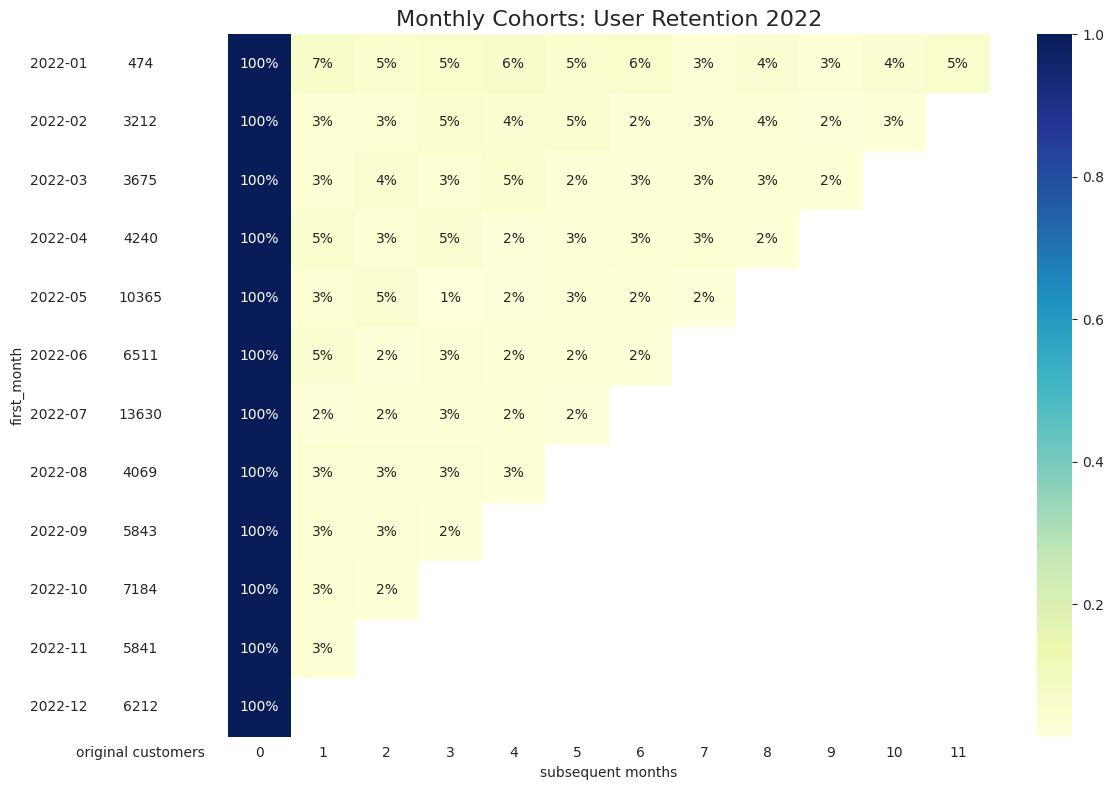

In [ ]:
#Vẽ Corhort
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2022', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()

**NOTES:**  
+ Làm tương tự với 2022 và có nhận xét là cả Retention Rate của 2019 và 2022 không có nhiều sự thay đổi do thị trường mới phục hồi nên chưa có nhiều thời gian để công ty cải thiện
+ Lí do retention thấp mặc dù 60-65% traffic có chạy Promotion trong năm 2022

Notes: Phân tích xem, nếu chỉ xét trong Promotion và Non-Promotion riêng thì tỉ lệ retention rate có thay đổi nhiều không (xem của 2022)

In [ ]:
df_join_all.head(4)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   
2  1fdbeb7eceba8a27d9d985b5b70c219a       100596  money in app          56.0   
3  7715c9955866bd296b98543412839abd       100852  bank account         119.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   
2  69cf9244654949047f006e441fa7a8a7           10.31            2.31   
3  879ed11af9d6d2b5cda4d299590735a7           27.75            1.03   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   
2         8.00 2022-07-30 11:16:55.483          1            0   
3        26.72 2022-07-04 22:33:07.458          1        85940   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   
2  Thor: Love And Thunder       Male 1989-05-18  Order successful     unknown   
3  Thor: Love And Thunder       Male 1997-08-31  Order successful     unknown   

              type        model platform        age  Month  Hour  Day Name  \
0  direct discount   iPhone13,1   mobile  36.013689      7    17    Friday   
1  direct discount      browser  website  33.730322      7    20    Friday   
2          unknown      unknown   mobile  35.789185      7    11  Saturday   
3  direct discount  devicemodel   mobile  27.501711      7    22    Monday   

  year_month  Dayofweek        os_version  campaign_type  year        Date  
0    2022-07          4               ios      Promotion  2022  2022-07-08  
1    2022-07          4           browser      Promotion  2022  2022-07-15  
2    2022-07          5           unknown  Non-Promotion  2022  2022-07-30  
3    2022-07          0  android & others      Promotion  2022  2022-07-04

In [ ]:
#xem lại tỉ lệ Promotion và Non Promotion của năm 2022 là bao nhiêu

# 1. Theo Number of Customers
df_year19_cus = df_join_all[(df_join_all['time']>='2022-01-01') & (df_join_all['status_id']==1)].groupby('campaign_type').agg(no_of_customer=('customer_id','nunique')).reset_index()
df_year19_cus

campaign_type  no_of_customer
0  Non-Promotion           27672
1      Promotion           47507

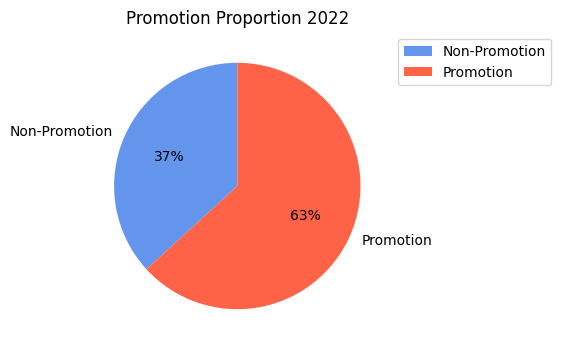

In [ ]:
# Vẽ pie chart

plt.figure(figsize=(8,4))

plt.pie(df_year19_cus['no_of_customer'],
        labels=df_year19_cus['campaign_type'],
        autopct='%1.0f%%',
        startangle=90,
        colors=('cornflowerblue','tomato')
)

plt.title('Promotion Proportion 2022')
plt.legend()
plt.legend(bbox_to_anchor=(1, 1))

In [ ]:
# 2. Theo Number of Tickets
df_year19_ticket = df_join_all[(df_join_all['time']>='2022-01-01') & (df_join_all['status_id']==1)].groupby('campaign_type').agg(no_of_tickets=('ticket_id','nunique')).reset_index()
df_year19_ticket

campaign_type  no_of_tickets
0  Non-Promotion          31655
1      Promotion          52045

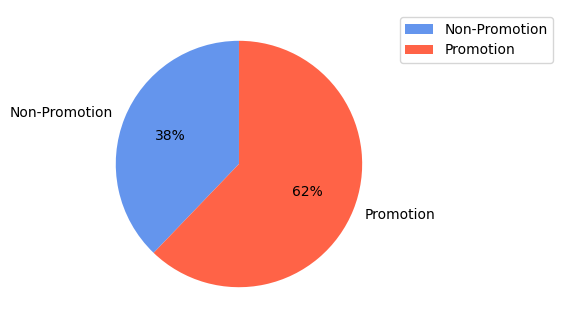

In [ ]:
# Vẽ pie chart

plt.figure(figsize=(8,4))

plt.pie(df_year19_ticket['no_of_tickets'],
        labels=df_year19_ticket['campaign_type'],
        autopct='%1.0f%%',
        startangle=90,
        colors=('cornflowerblue','tomato')
)
plt.legend()
plt.legend(bbox_to_anchor=(1, 1))

**Notes:**

Notes: Dựa vào đơn hàng đầu tiên để phân biệt 2 nhóm là: Đến từ Promotion hay Non-Promotion lần đầu (Organic)
+ Đánh số thứ tự đơn hàng theo customer_id
+ customer_id nào đủ điều kiện là stt 1 và Promotion thì thuộc nhóm Promotion (First_Order)
+ Nếu xét xem nhóm khách hàng đó có quay lại hay không thì xét theo customer_id Promotion và có stt là 2 (Tức là có quay lại mua đơn hàng thứ 2 sau khi mua đơn hàng số 1 có khuyến mãi)

In [ ]:
df_data_check = df_join_all[(df_join_all['time']>'2022-01-01') & (df_join_all['status_id']==1)][['customer_id','ticket_id','time','campaign_type']].sort_values(by=['customer_id','time'])
df_data_check.head(10)

customer_id                         ticket_id                    time  \
66484        100003  34c4764b4afa000af4c33a525f20eace 2022-05-22 12:52:12.105   
10001        100004  1c4aa39842bfc83dbb5856c25a33d9cb 2022-12-20 06:26:21.373   
108794       100007  5565ba5e22475c7cce298a2bea470428 2022-03-21 17:57:18.460   
0            100009  4f5200dcdcf2396b8d50ff84bf423f32 2022-07-08 17:46:36.145   
5585         100009  0724203b5146b0ebae6e3678ed7eccde 2022-12-24 09:32:45.477   
69405        100013  f95441286dcfa045f61a5760662616e1 2022-05-05 12:22:44.587   
140483       100018  1e40fb2d0f6264ed3127f79b1a12c9c9 2022-09-07 21:13:17.896   
90595        100018  9a959ff1649950949ff2c0aff4b62205 2022-11-19 16:25:43.981   
35270        100020  af02fc96a6703af7d93162d9f8c61dba 2022-05-28 19:09:37.936   
16649        100023  5ed44ff62214268ffcb14d4ea78b04d8 2022-05-16 08:45:42.397   

        campaign_type  
66484   Non-Promotion  
10001   Non-Promotion  
108794      Promotion  
0           Promotion  
5585        Promotion  
69405   Non-Promotion  
140483  Non-Promotion  
90595       Promotion  
35270       Promotion  
16649       Promotion

In [ ]:
# Đánh số thứ tự của khách hàng

df_data_check['row_number']=df_data_check.groupby('customer_id').cumcount() + 1
df_data_check.head(10)

customer_id                         ticket_id                    time  \
66484        100003  34c4764b4afa000af4c33a525f20eace 2022-05-22 12:52:12.105   
10001        100004  1c4aa39842bfc83dbb5856c25a33d9cb 2022-12-20 06:26:21.373   
108794       100007  5565ba5e22475c7cce298a2bea470428 2022-03-21 17:57:18.460   
0            100009  4f5200dcdcf2396b8d50ff84bf423f32 2022-07-08 17:46:36.145   
5585         100009  0724203b5146b0ebae6e3678ed7eccde 2022-12-24 09:32:45.477   
69405        100013  f95441286dcfa045f61a5760662616e1 2022-05-05 12:22:44.587   
140483       100018  1e40fb2d0f6264ed3127f79b1a12c9c9 2022-09-07 21:13:17.896   
90595        100018  9a959ff1649950949ff2c0aff4b62205 2022-11-19 16:25:43.981   
35270        100020  af02fc96a6703af7d93162d9f8c61dba 2022-05-28 19:09:37.936   
16649        100023  5ed44ff62214268ffcb14d4ea78b04d8 2022-05-16 08:45:42.397   

        campaign_type  row_number  
66484   Non-Promotion           1  
10001   Non-Promotion           1  
108794      Promotion           1  
0           Promotion           1  
5585        Promotion           2  
69405   Non-Promotion           1  
140483  Non-Promotion           1  
90595       Promotion           2  
35270       Promotion           1  
16649       Promotion           1

In [ ]:
# Đếm xem có bao nhiêu khách hàng thuộc nhóm Promotion lần đầu
df_data_check[(df_data_check['campaign_type']=='Promotion') & df_data_check['row_number']==1]['customer_id'].nunique()

46397

In [ ]:
46397/47505

0.9766761393537522

Notes:
+ So sánh với Pie chart, có 47505 người tham gia Promotion trong năm 2022, trong đó có (46397/47505) % kh là tham gia lần đầu
> Có tới 97% khách hàng đến từ Promotion lần đầu trong nhóm khách hàng có tham gia Promotion ---> Retention là bao nhiêu?

In [ ]:
df_first_promo_list = df_data_check[(df_data_check['campaign_type']=='Promotion') & df_data_check['row_number']==1]['customer_id']
df_first_promo_list.drop_duplicates(inplace=True)

#Merge 2 bảng lại với nhau để ra bảng chỉ có các khách hàng dùng Promotion lần đầu
df_first_promo_check = pd.merge(df_data_check,df_first_promo_list, how='inner', on='customer_id')
df_first_promo_check

<ipython-input-1012-2d1b0aec40c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_promo_list.drop_duplicates(inplace=True)


customer_id                         ticket_id                    time  \
0           100007  5565ba5e22475c7cce298a2bea470428 2022-03-21 17:57:18.460   
1           100009  4f5200dcdcf2396b8d50ff84bf423f32 2022-07-08 17:46:36.145   
2           100009  0724203b5146b0ebae6e3678ed7eccde 2022-12-24 09:32:45.477   
3           100020  af02fc96a6703af7d93162d9f8c61dba 2022-05-28 19:09:37.936   
4           100023  5ed44ff62214268ffcb14d4ea78b04d8 2022-05-16 08:45:42.397   
...            ...                               ...                     ...   
54854       231393  92d8ee40d9c67d6735032d8b6967150a 2022-12-30 22:23:37.942   
54855       231395  5ff0423850f31354fc5825f7f1c1ec3e 2022-12-30 21:49:52.181   
54856       231397  65156cae3a601e35c266d6160b0600b4 2022-12-30 23:12:45.231   
54857       231398  53cbd4a121957face9e948c3c794384c 2022-12-31 12:24:25.127   
54858       231399  cca3b749b0ad575cf68aeeb4c4449154 2022-12-31 20:35:10.328   

      campaign_type  row_number  
0         Promotion           1  
1         Promotion           1  
2         Promotion           2  
3         Promotion           1  
4         Promotion           1  
...             ...         ...  
54854     Promotion           1  
54855     Promotion           1  
54856     Promotion           1  
54857     Promotion           1  
54858     Promotion           1  

[54859 rows x 5 columns]

In [ ]:
(
    df_first_promo_check[df_first_promo_check['row_number']==2]['customer_id'].nunique()
    /
    df_first_promo_check['customer_id'].nunique()
)

0.134793197836067

Notes:
+ Có 13.4% khách hàng quay lại sau lần đầu tham gia Promotion (lần 1 hay lần 2,...)
> Vậy nhóm Organic thì sao ?

In [ ]:
df_data_check[(df_data_check['campaign_type']=='Non-Promotion') & df_data_check['row_number']==1]['customer_id'].nunique()

25565

In [ ]:
list_first_non_promo = df_data_check[(df_data_check['campaign_type']=='Non-Promotion') & df_data_check['row_number']==1]['customer_id']
list_first_non_promo.drop_duplicates(inplace=True)

df_first_non_promo_check = pd.merge(df_data_check,list_first_non_promo, how='inner', on='customer_id')

(
    df_first_non_promo_check[df_first_non_promo_check['row_number']==2]['customer_id'].nunique()
    /
    df_first_non_promo_check['customer_id'].nunique()
)


<ipython-input-1015-6f6615760a99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_first_non_promo.drop_duplicates(inplace=True)


0.13905730490905535

Notes:Nhóm khách hàng first_time là organic thì tỉ lệ quay lại là 13.9%


## **3.6 Payment success rate**

In [ ]:
#Tạo funtion tính riêng các đơn hàng thành công
def cal_success(x):
  return(x==1).sum()

df_sr = df_join_all.groupby('year_month').agg(n_ords=('ticket_id','count'),
                                                   n_success=('status_id',cal_success)).reset_index()
df_sr.head(5)

year_month  n_ords  n_success
0    2019-01    2019       1359
1    2019-02    1626       1427
2    2019-03    1004        866
3    2019-04    4069       3190
4    2019-05    4430       3617

In [ ]:
#Tạo thêm cột tỉ lệ success (=n_success/n_order)

df_sr['success_rate']=(df_sr['n_success']/df_sr['n_ords'])*100
df_sr.head(5)

year_month  n_ords  n_success  success_rate
0    2019-01    2019       1359     67.310550
1    2019-02    1626       1427     87.761378
2    2019-03    1004        866     86.254980
3    2019-04    4069       3190     78.397641
4    2019-05    4430       3617     81.647856

Text(0.5, 1.0, 'Payment success rate by months')

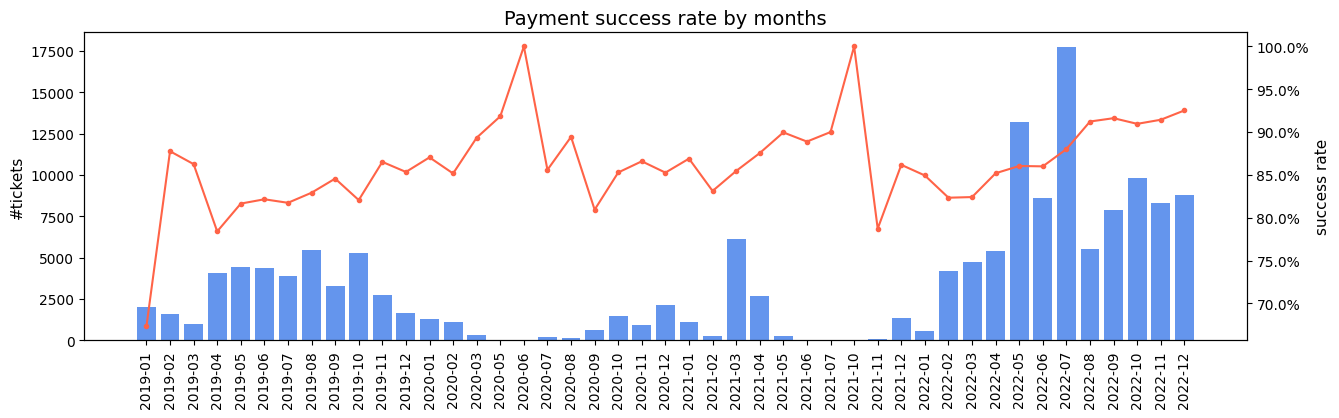

In [ ]:
# Vẽ biểu đồ kết hợp giữa bar chart (số đơn hàng orders) và line chart (tỉ lệ đơn hàng thành công)

from matplotlib.ticker import PercentFormatter

fig, ax1 = plt.subplots(figsize=(15,4))

ax1.bar(df_sr['year_month'], df_sr['n_ords'], color="cornflowerblue")
plt.ylabel('#tickets', fontsize=11)
plt.xticks(rotation='vertical')

ax2 = ax1.twinx()
ax2.plot(df_sr['year_month'], df_sr['success_rate'], color="tomato", marker="o", ms=3)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.ylabel('success rate', fontsize=11)
plt.title('Payment success rate by months', fontsize=14)


In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob       description error_group  \
0  Thor: Love And Thunder       Male 1989-02-25  Order successful     unknown   
1  Thor: Love And Thunder       Male 1991-06-09  Order successful     unknown   

              type       model platform        age  Month  Hour Day Name  \
0  direct discount  iPhone13,1   mobile  36.013689      7    17   Friday   
1  direct discount     browser  website  33.730322      7    20   Friday   

  year_month  Dayofweek os_version campaign_type  year        Date  
0    2022-07          4        ios     Promotion  2022  2022-07-08  
1    2022-07          4    browser     Promotion  2022  2022-07-15

Notes:
+ Theo thời gian thì sr dao động từ 80-90%, còn 100% thì data ở đó đang bị thiếu
+ Mặc dù thành công nhiều nhưng vẫn bị lỗi => Xem kĩ lại các nhóm  lỗi


In [ ]:
#Xem thanh toán qua paying_method nào thì success_rate cao nhất
def cal_success(x):
  return(x==1).sum()

df_sr_payment = df_join_all[df_join_all['paying_method']!='other'].groupby('paying_method').agg(n_ords=('ticket_id','count'),
                                                   n_success=('status_id',cal_success)).reset_index()

df_sr_payment['success_rate']=(df_sr_payment['n_success']/df_sr_payment['n_ords'])*100
df_sr_payment.sort_values(by='success_rate',ascending=False).head(5)

paying_method  n_ords  n_success  success_rate
3  money in app   66580      64817     97.352058
0  bank account   52643      42057     79.890964
1   credit card   19820      15408     77.739657
2    debit card   15680      11395     72.672194

#### **Error Trend**

In [ ]:
#Tổng hợp lại số đơn hàng của các nhóm lỗi
df_error_group = df_join_all[df_join_all['status_id']!=1].groupby(['year_month','error_group']).agg(n_ords=('ticket_id','count')).reset_index()
df_error_group.head(5)

year_month error_group  n_ords
0    2019-01    customer     291
1    2019-01    external     369
2    2019-02    customer      66
3    2019-02    external     133
4    2019-03    customer      44

In [ ]:
df_error_group['error_group'].unique()

array(['customer', 'external', 'internal'], dtype=object)

Notes: Có 3 nhóm lỗi
+ Customer: Lỗi đến từ phía bản thân khách hàng
+ Internal: Lỗi đến từ nội bộ bán vé (Lỗi app, ...)
+ External: Lỗi đến từ bên thứ 3 bên ngoài (app thanh toán,...)
=> Vẽ line chart ra để phân tích các nhóm lỗi này

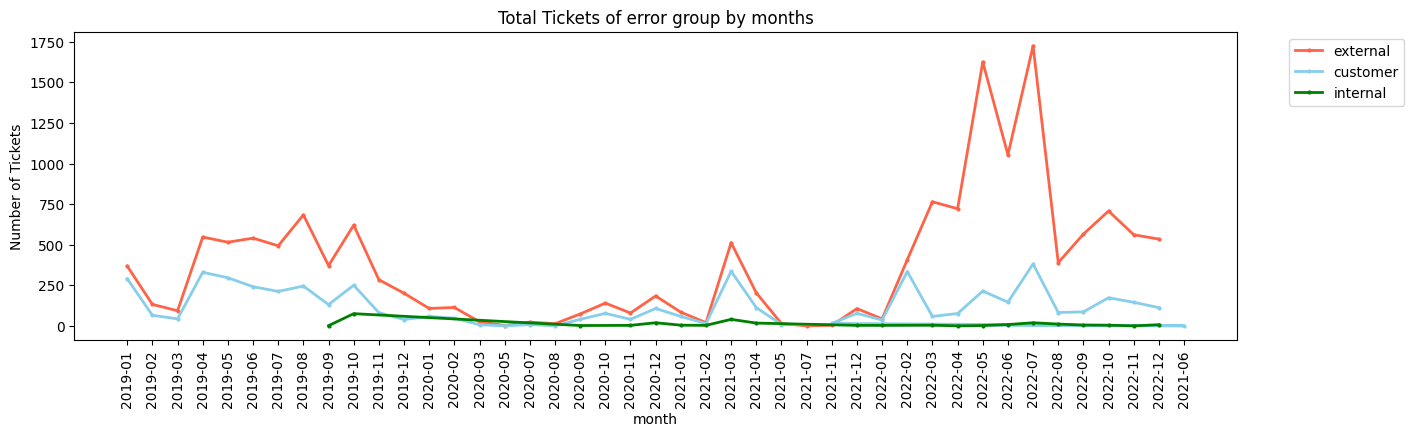

In [ ]:
#Phân bố nhóm lỗi
error_color_pairs = [('external','tomato'),('customer','skyblue'),('internal','green')]

plt.figure(figsize=(15,4))
for error, color in error_color_pairs:
  df_err_line = df_error_group[df_error_group['error_group']==error]
  plt.plot(df_err_line['year_month'],
           df_err_line['n_ords'],
           label=error,
           marker='o',
           color=color,
           linewidth=2,
           markersize=2)

plt.title('Total Tickets of error group by months')
plt.xlabel('month')
plt.ylabel('Number of Tickets')
plt.legend(loc='upper right',bbox_to_anchor=(1.15,1))
plt.xticks(rotation=90)
plt.show()

Notes:
+ Lỗi customer trải đều
+ Lỗi internal khá ít
+ Lỗi external nhiều và tăng cao trong năm 2022

In [ ]:
# Phân bổ nhóm mã lỗi

df_error = df_join_all[df_join_all['status_id']!=1].groupby(['year_month','description']).agg(n_ords=('ticket_id','count')).sort_values(by='year_month').reset_index()
df_error

year_month  \
0      2019-01   
1      2019-01   
2      2019-01   
3      2019-01   
4      2019-01   
..         ...   
221    2022-12   
222    2022-12   
223    2022-12   
224    2022-12   
225    2022-12   

                                                                                      description  \
0    Insufficient funds in customer account. Please add more funds and try the transaction again.   
1                                                                      No response from your bank   
2           Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.   
3                                                                        Payment failed from bank   
4                                                                                 Payment overdue   
..                                                                                            ...   
221                                                                      Payment failed from bank   
222                                                                               Payment overdue   
223  Insufficient funds in customer account. Please add more funds and try the transaction again.   
224                                                          Need verify your account to continue   
225                                                               Transaction temporarily limited   

     n_ords  
0       217  
1       228  
2        56  
3       141  
4        18  
..      ...  
221     535  
222      51  
223       1  
224      61  
225       8  

[226 rows x 3 columns]

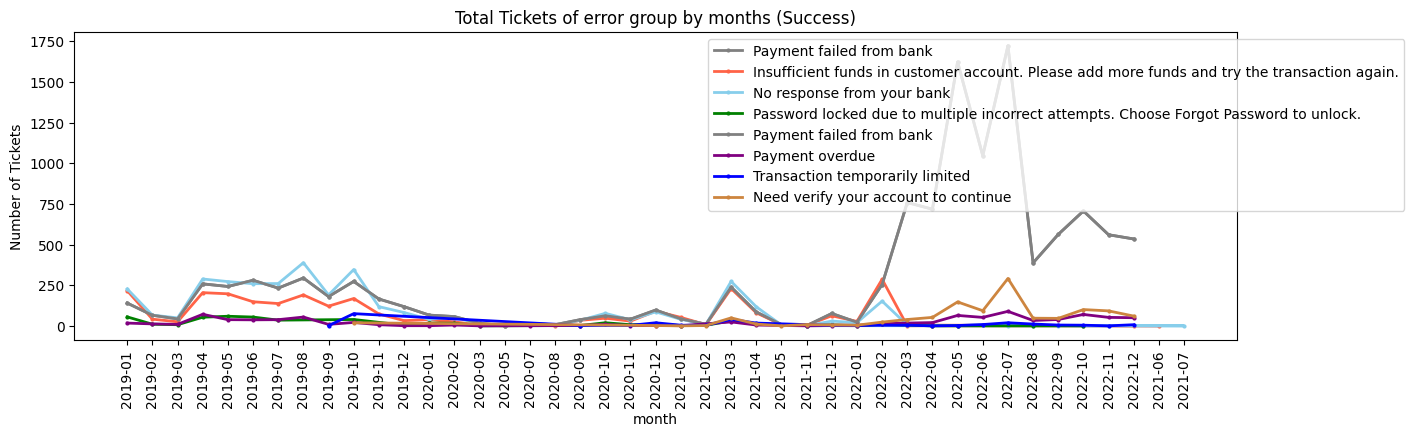

In [ ]:
#Vẽ line chart

error_color_pairs = [('Payment failed from bank','gray'),
 ('Insufficient funds in customer account. Please add more funds and try the transaction again.','tomato'),
  ('No response from your bank','skyblue'),
   ('Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.','green'),
    ('Payment failed from bank','gray'),
     ('Payment overdue','purple'),
      ('Transaction temporarily limited','blue'),
       ('Need verify your account to continue','peru')]

plt.figure(figsize=(15,4))
for error, color in error_color_pairs:
  df_err_line = df_error[df_error['description']==error]
  plt.plot(df_err_line['year_month'],
           df_err_line['n_ords'],
           label=error,
           marker='o',
           color=color,
           linewidth=2,
           markersize=2)

plt.title('Total Tickets of error group by months (Success)')
plt.xlabel('month')
plt.ylabel('Number of Tickets')
plt.legend(loc='upper right',bbox_to_anchor=(1.15,1))
plt.xticks(rotation=90)
plt.show()

Notes: Lỗi đến từ bank tăng đột biến vào năm 2022

#### **Why & How Success_rate = 0%**

In [ ]:
list_sr_0 = list(df_value_1[df_value_1['success_rate']<0.1]['customer_id'].unique())

In [ ]:
df_value_1.head(5)

customer_id  no_of_tickets  n_failed  n_success  no_of_months  total_money  \
0       100001              1         0        1.0           1.0         7.42   
1       100003              6         0        6.0           6.0        60.95   
2       100004              1         0        1.0           1.0        32.25   
3       100005              1         0        1.0           1.0         9.49   
4       100006              1         0        1.0           1.0        12.37   

   total_discount  total_promotion  no_of_days  success_rate  promotion_rate  \
0            2.06              1.0         1.0           1.0        1.000000   
1            2.56              1.0         6.0           1.0        0.166667   
2            0.00              0.0         1.0           1.0        0.000000   
3            2.06              1.0         1.0           1.0        1.000000   
4            0.00              0.0         1.0           1.0        0.000000   

   discount_rate customers_dis promotion_dis  
0       0.277628           1.0           1.0  
1       0.042002           6.0           1.0  
2       0.000000           1.0           0.0  
3       0.217071           1.0           1.0  
4       0.000000           1.0           0.0

In [ ]:
def cal_n_promotion(x):
  return(x=='Promotion').sum()

df_sr_0_metric = (
    df_join_all[df_join_all['customer_id'].isin(list_sr_0)]
    .groupby('customer_id')
    .agg(n_orders = ('ticket_id','count'),
         s_money=('original_price','sum'),
         s_discount=('discount_value','sum'),
         n_promotions=('campaign_type',cal_n_promotion)).reset_index()
)

In [ ]:
df_sr_0_metric['promotion_rate'] = df_sr_0_metric['n_promotions']/df_sr_0_metric['n_orders']
df_sr_0_metric['discount_rate'] = df_sr_0_metric['s_discount']/df_sr_0_metric['s_money']

In [ ]:
df_sr_0_metric.head(5)

customer_id  n_orders  s_money  s_discount  n_promotions  promotion_rate  \
0       100012         1    69.12        5.07             1             1.0   
1       100025         1    15.01        1.32             1             1.0   
2       100041         2    22.32        3.36             2             1.0   
3       100044         1     8.66        0.00             0             0.0   
4       100069         1    14.85        0.00             0             0.0   

   discount_rate  
0       0.073351  
1       0.087941  
2       0.150538  
3       0.000000  
4       0.000000

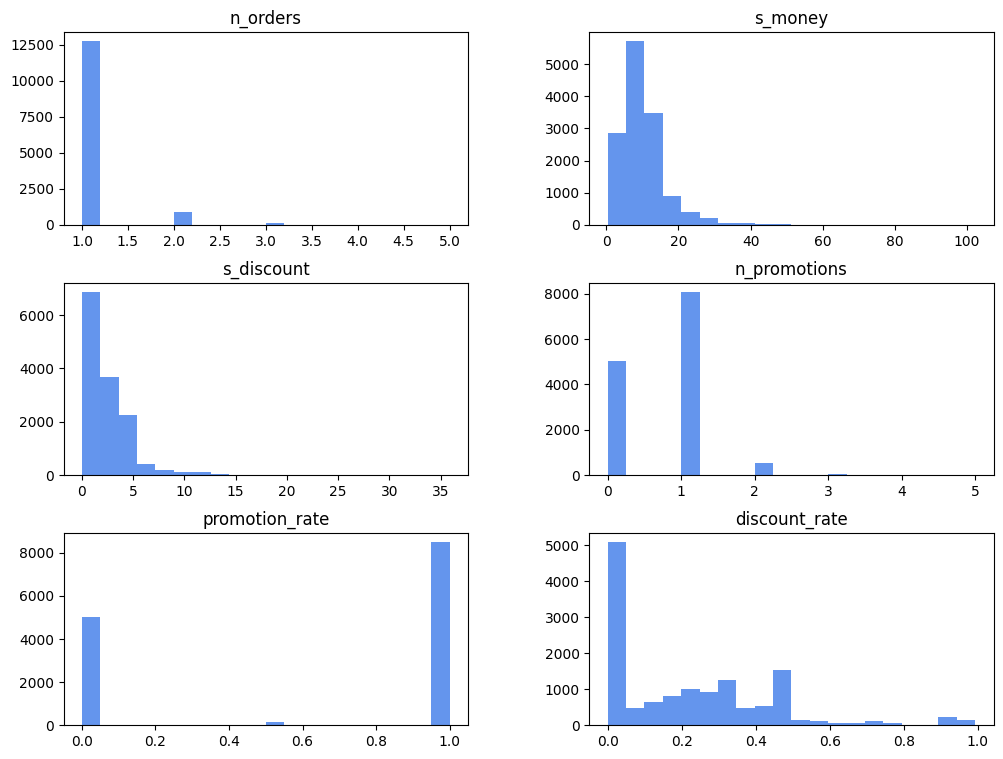

In [ ]:
# Vẽ Charts ra để xem tổng quan của các chỉ số
df_sr_0_metric.iloc[:,1:].hist(figsize=(12,9),grid=False,color='cornflowerblue', bins=20)
plt.show()

Notes: Họ bị lỗi gì mà tại sao failed 1 lần và stop luôn không retry ?

In [ ]:
df_error_0 = (
    df_join_all[(df_join_all['status_id']!=1) & (df_join_all['customer_id'].isin(list_sr_0))]
    .groupby(['year_month','description'])
    .agg(n_ords=('ticket_id','count'))
    .sort_values(by ='year_month',ascending=True)
    .reset_index()

  )

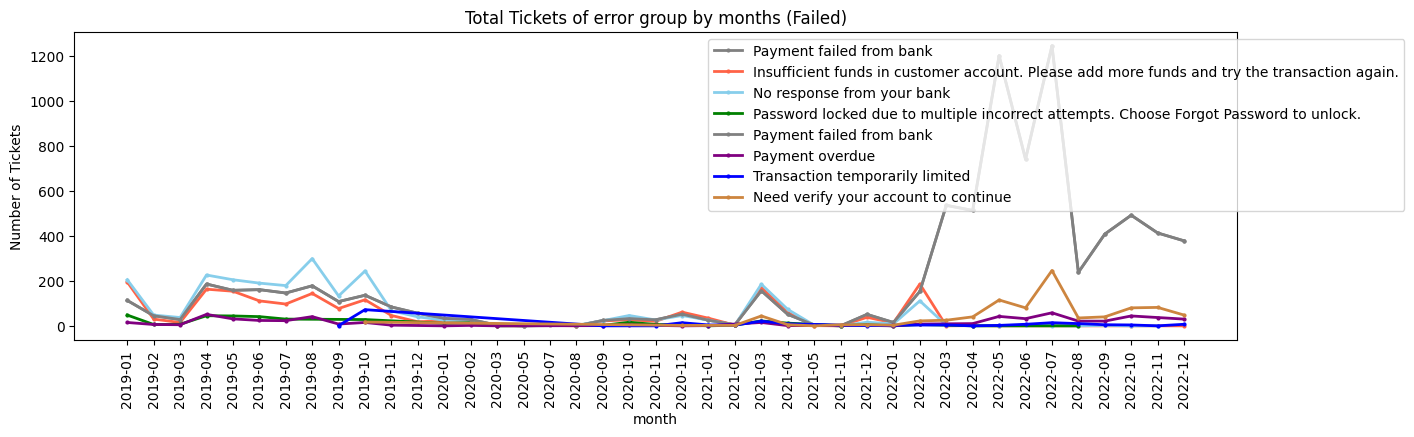

In [ ]:
#Vẽ line chart

error_color_pairs = [('Payment failed from bank','gray'),
 ('Insufficient funds in customer account. Please add more funds and try the transaction again.','tomato'),
  ('No response from your bank','skyblue'),
   ('Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.','green'),
    ('Payment failed from bank','gray'),
     ('Payment overdue','purple'),
      ('Transaction temporarily limited','blue'),
       ('Need verify your account to continue','peru')]

plt.figure(figsize=(15,4))
for error, color in error_color_pairs:
  df_err_line = df_error_0[df_error_0['description']==error]
  plt.plot(df_err_line['year_month'],
           df_err_line['n_ords'],
           label=error,
           marker='o',
           color=color,
           linewidth=2,
           markersize=2)

plt.title('Total Tickets of error group by months (Failed)')
plt.xlabel('month')
plt.ylabel('Number of Tickets')
plt.legend(loc='upper right',bbox_to_anchor=(1.15,1))
plt.xticks(rotation=90)
plt.show()

Notes:
+ Nhóm bị lỗi này cũng gần như là nhóm bị lỗi của toàn bộ khách hàng (nhìn lại chart hist phía trên)
+ Lí do họ lỗi và stop luôn (chỉ có số ít quay lại và mua lần 2) là do:
> + 1. Lỗi bên bank và họ không chủ động được
> + 2. Lỗi định danh tài khoản -> nghi ngờ gian lận hoặc không đủ điều kiện để upgrade level tài khoản

# **4. Insights and Recommendations**

![[3] Insights & Charts.png](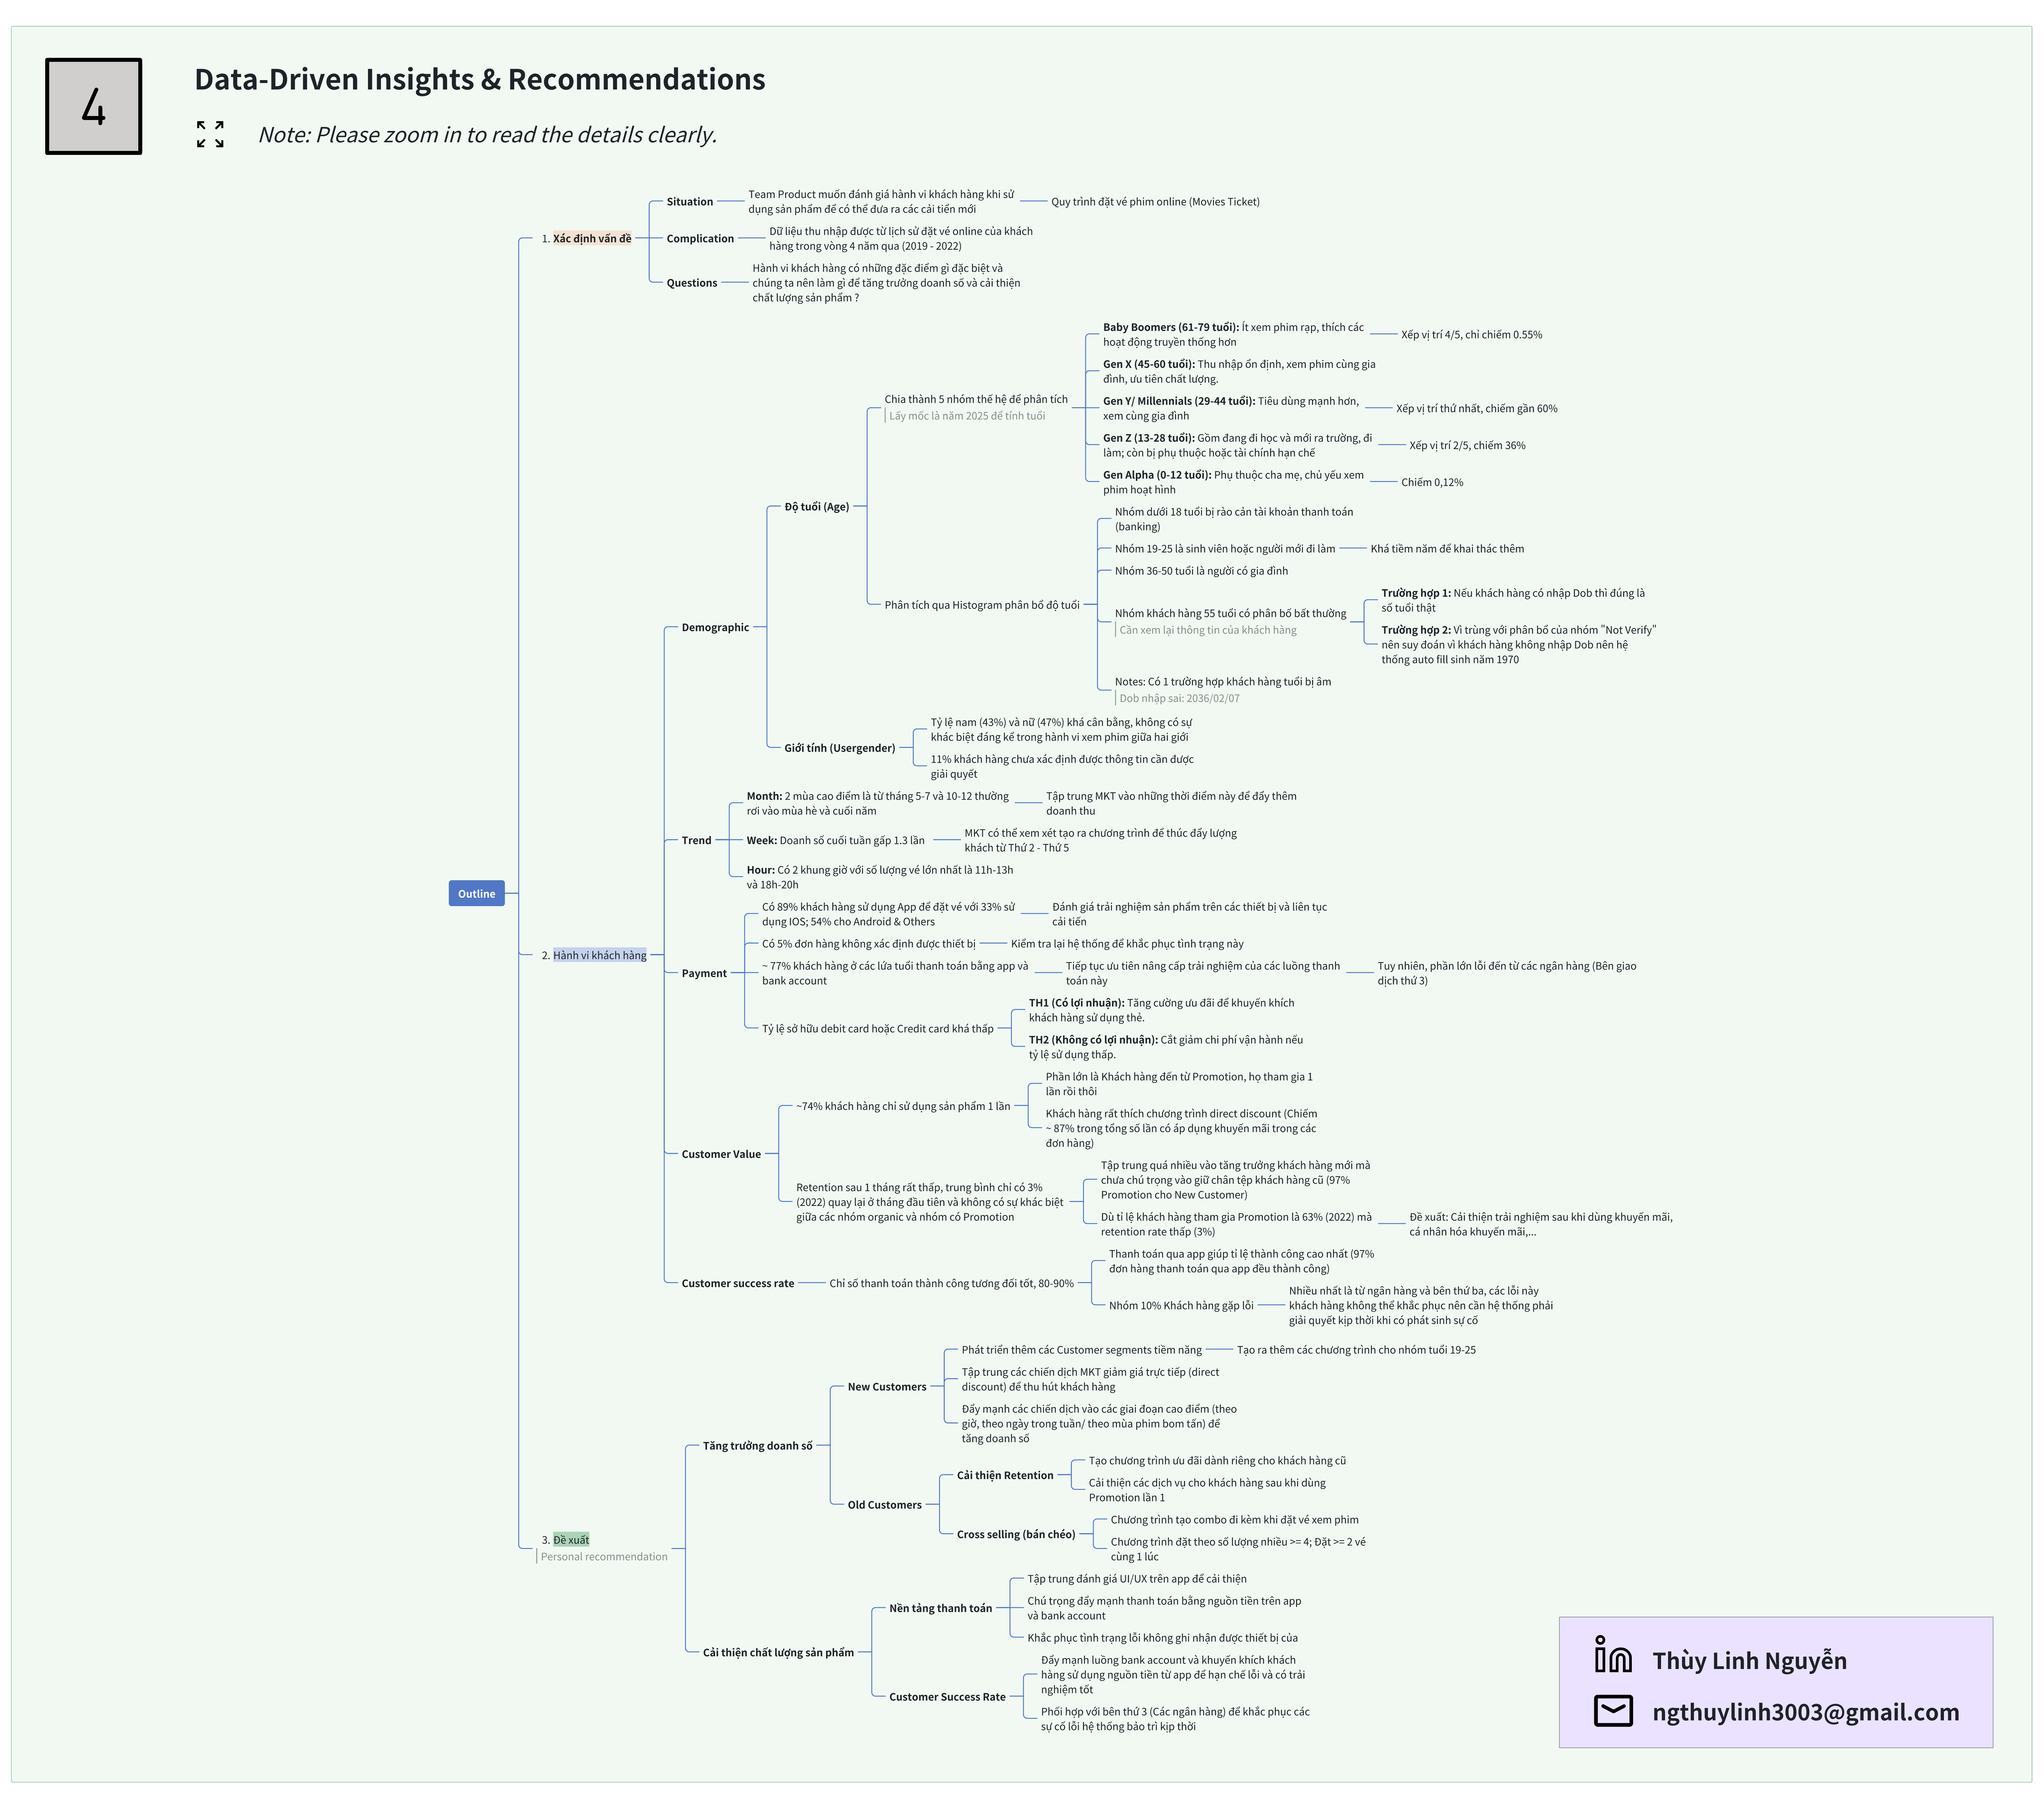)

![[3] Insights & Charts.png](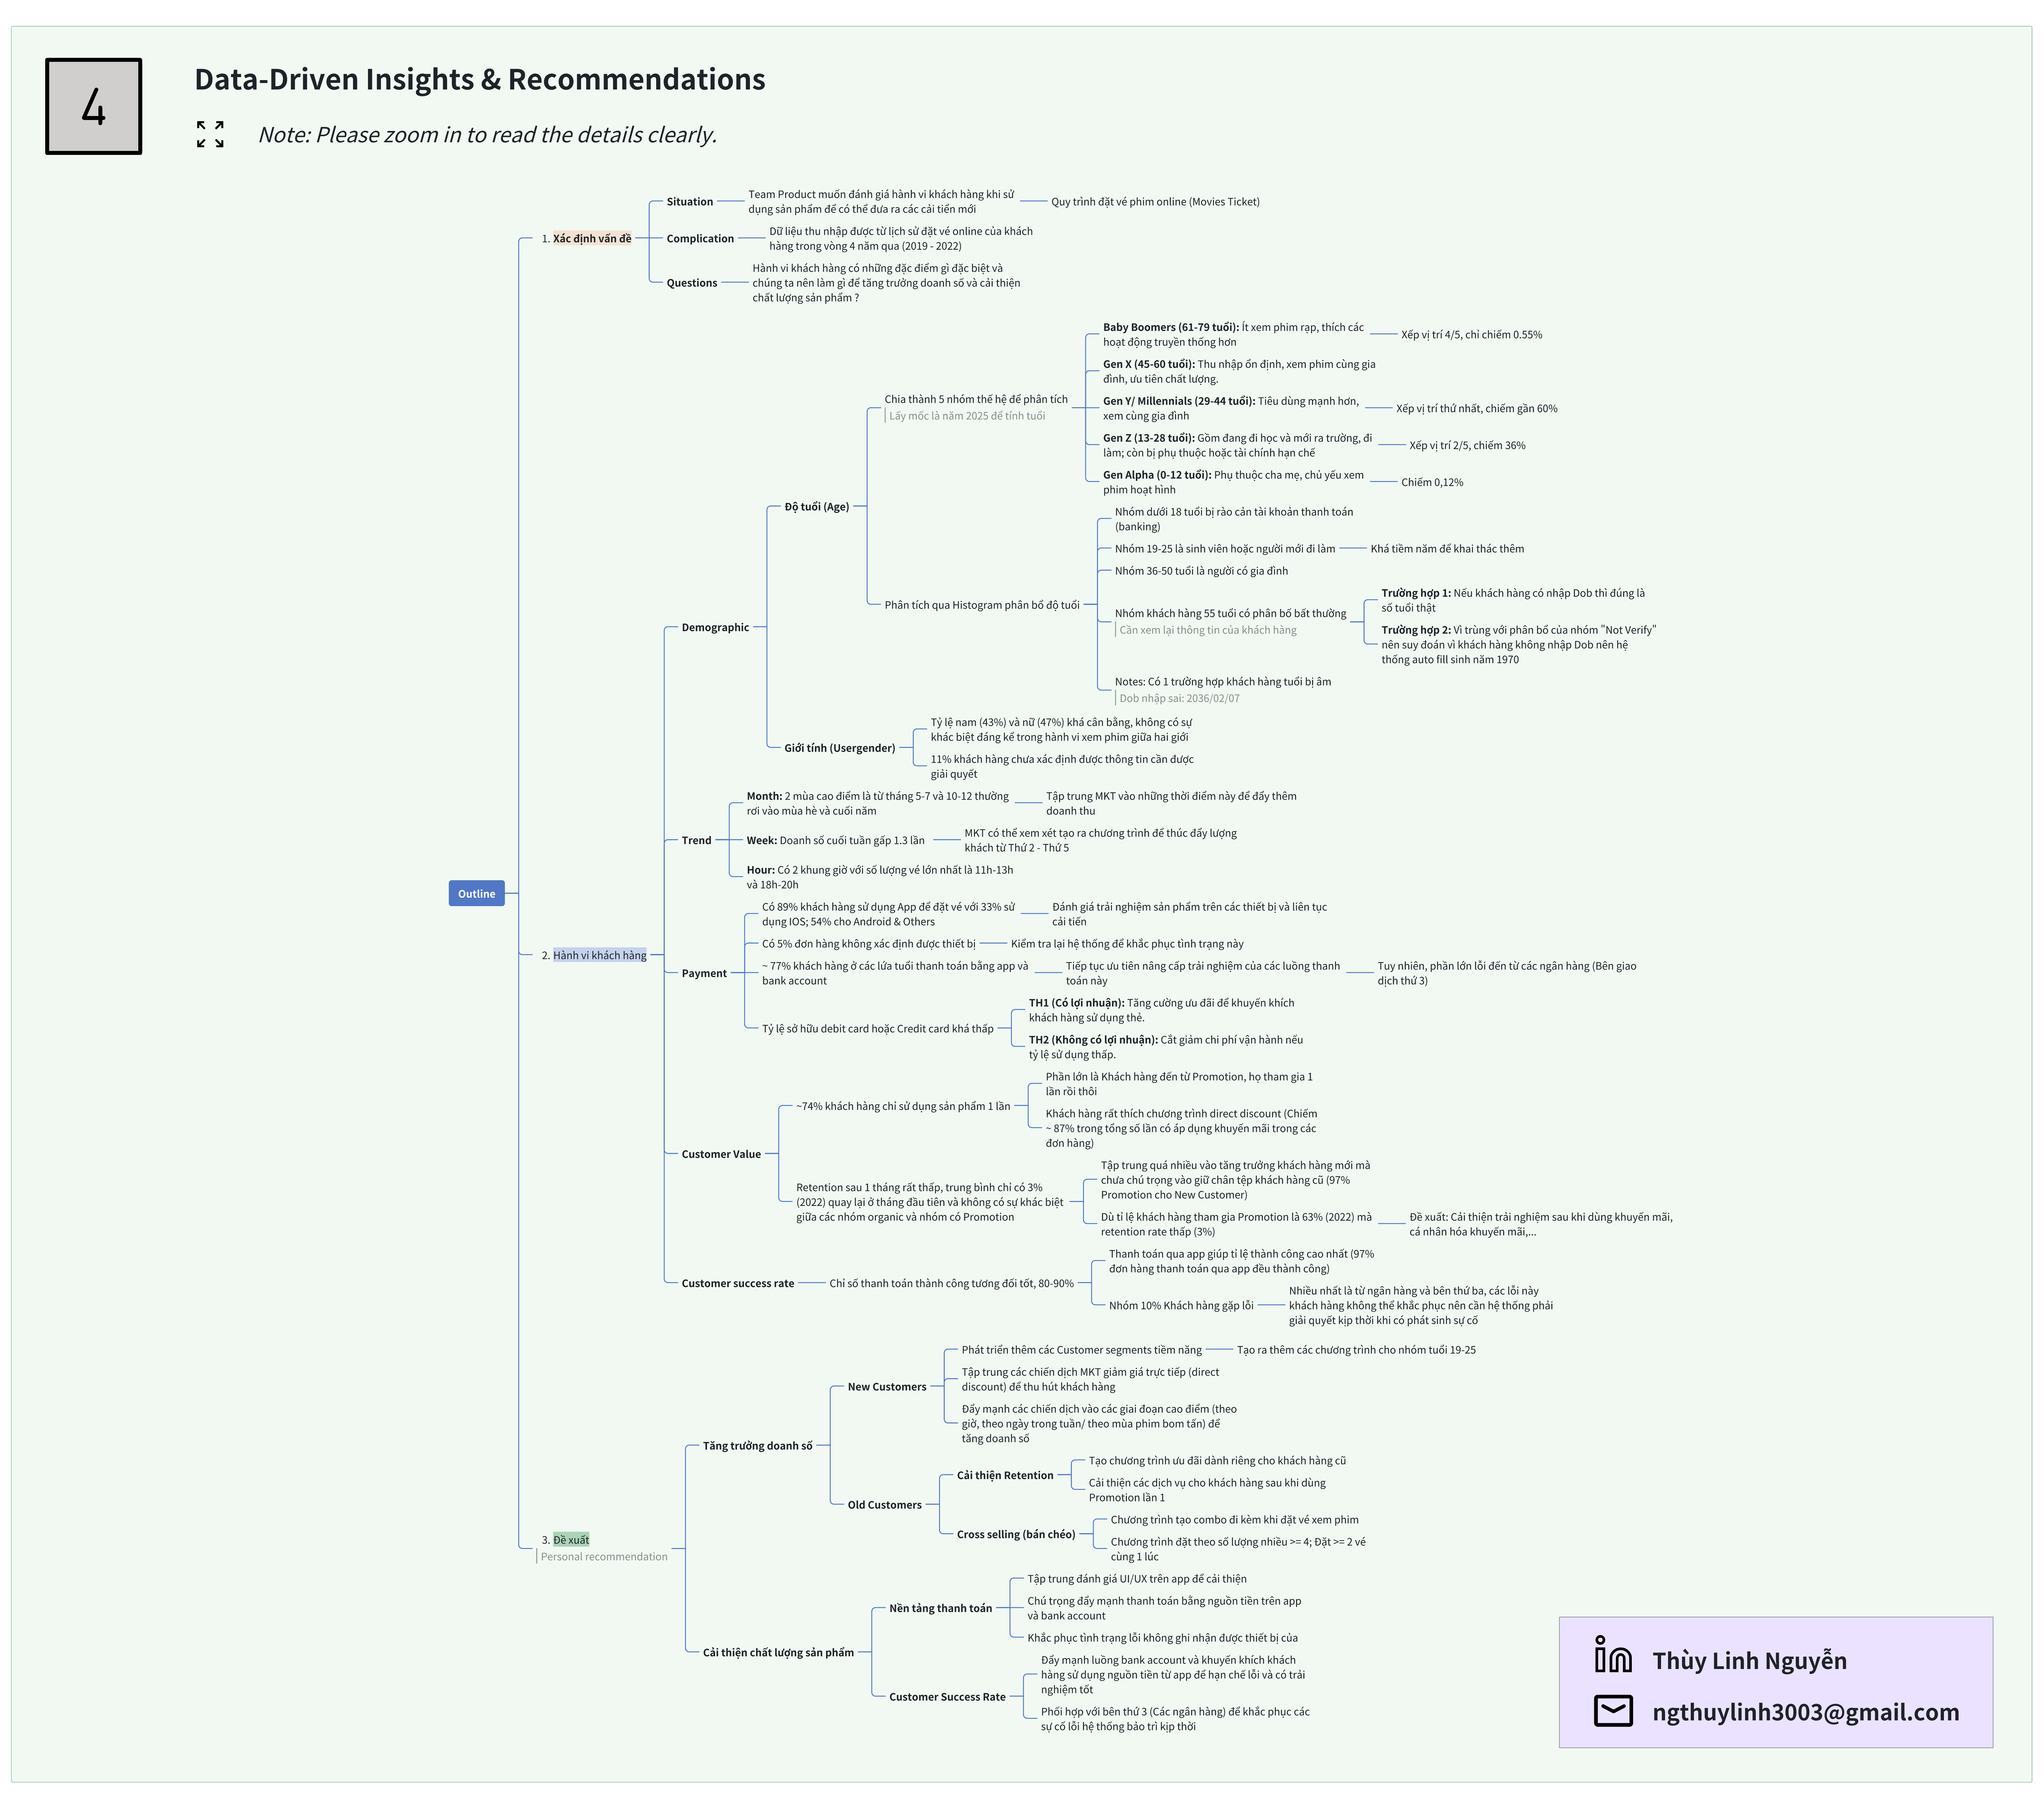)

**Thank you for taking the time to read this analysis. I appreciate your interest and welcome any feedback**
> **Nguyễn Thùy Linh**
>**ngthuylinh3003@gmail.com**
